# 9章　プロットと可視化

## 9.1 Matplotlib APIの概要

In [39]:
%matplotlib notebook
# この章でのインポート
import matplotlib.pyplot as plt
import numpy as np
from numpy.random  import randn
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime
import seaborn as sns

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

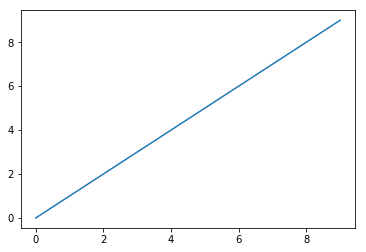

In [5]:
plt.plot(data)

### 9.1.1 図とサブプロット

<IPython.core.display.Javascript object>


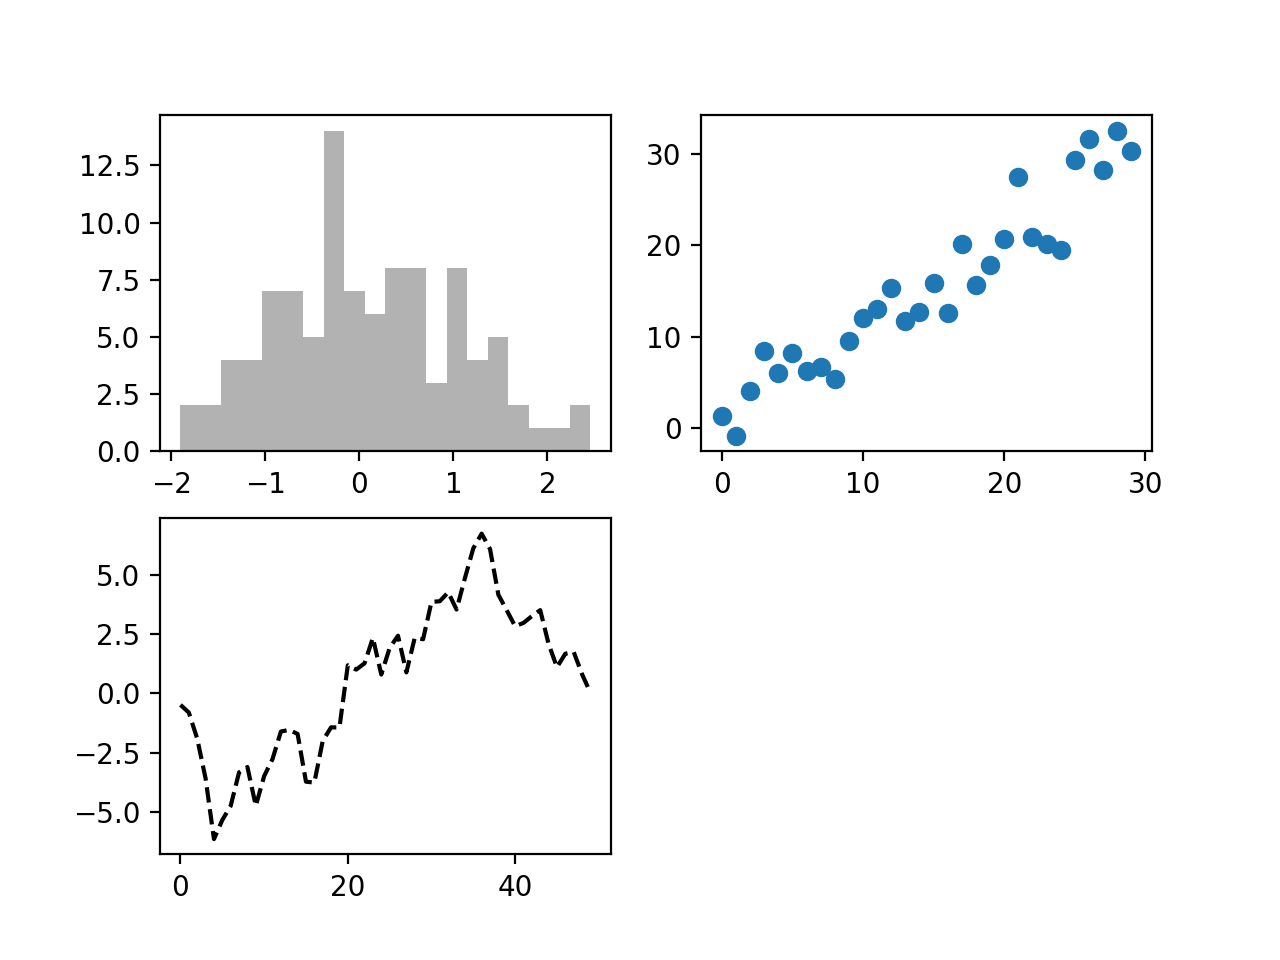

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), "k--")
_ = ax1.hist(np.random.randn(100), bins=20, color="k", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


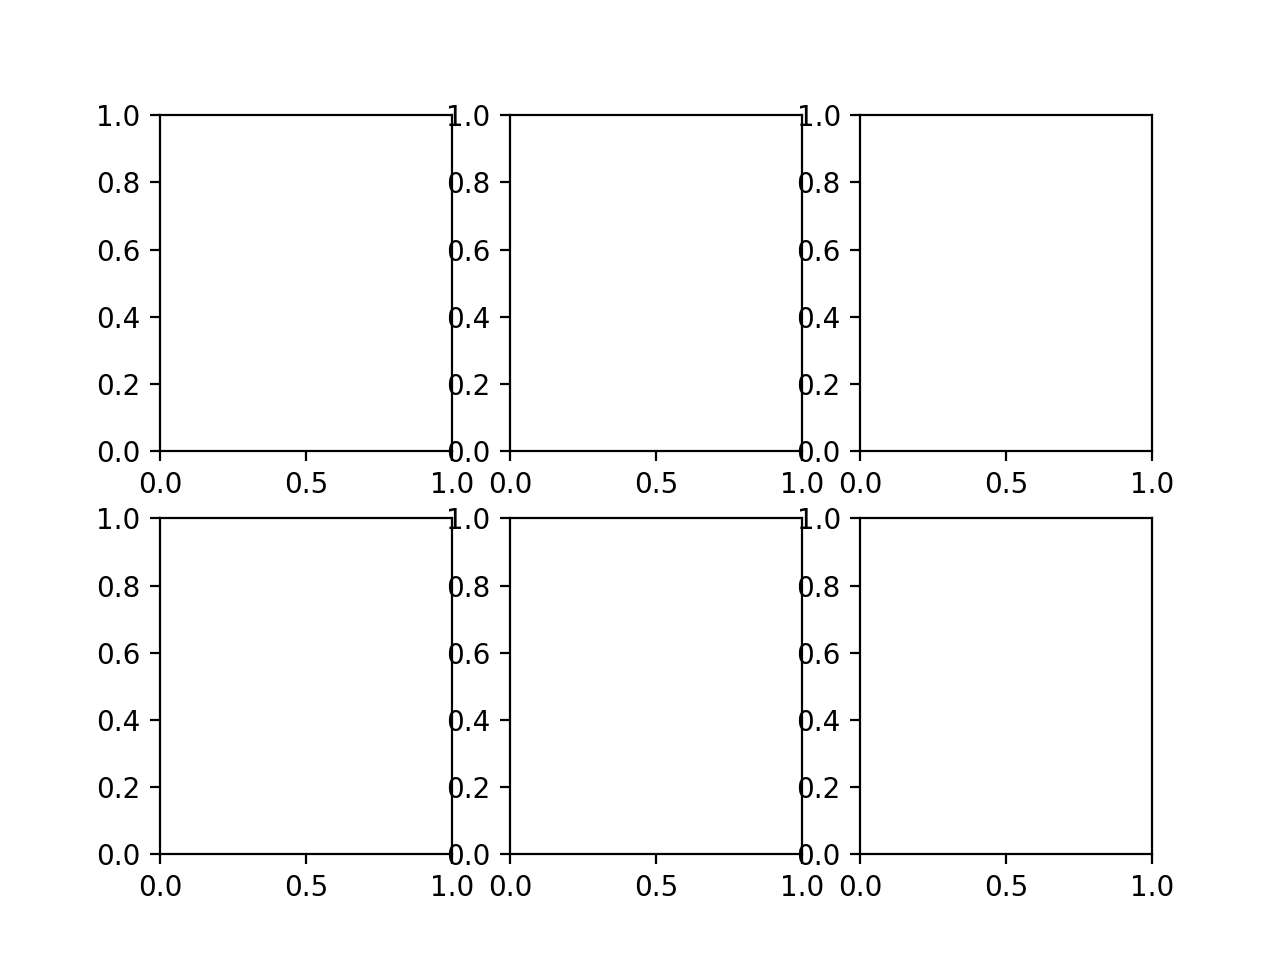

In [19]:
fig, axes = plt.subplots(2, 3)

In [20]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116384e48>,
      dtype=object)

### 9.1.1.1 サブプロットの周りの空白を調整する

<IPython.core.display.Javascript object>


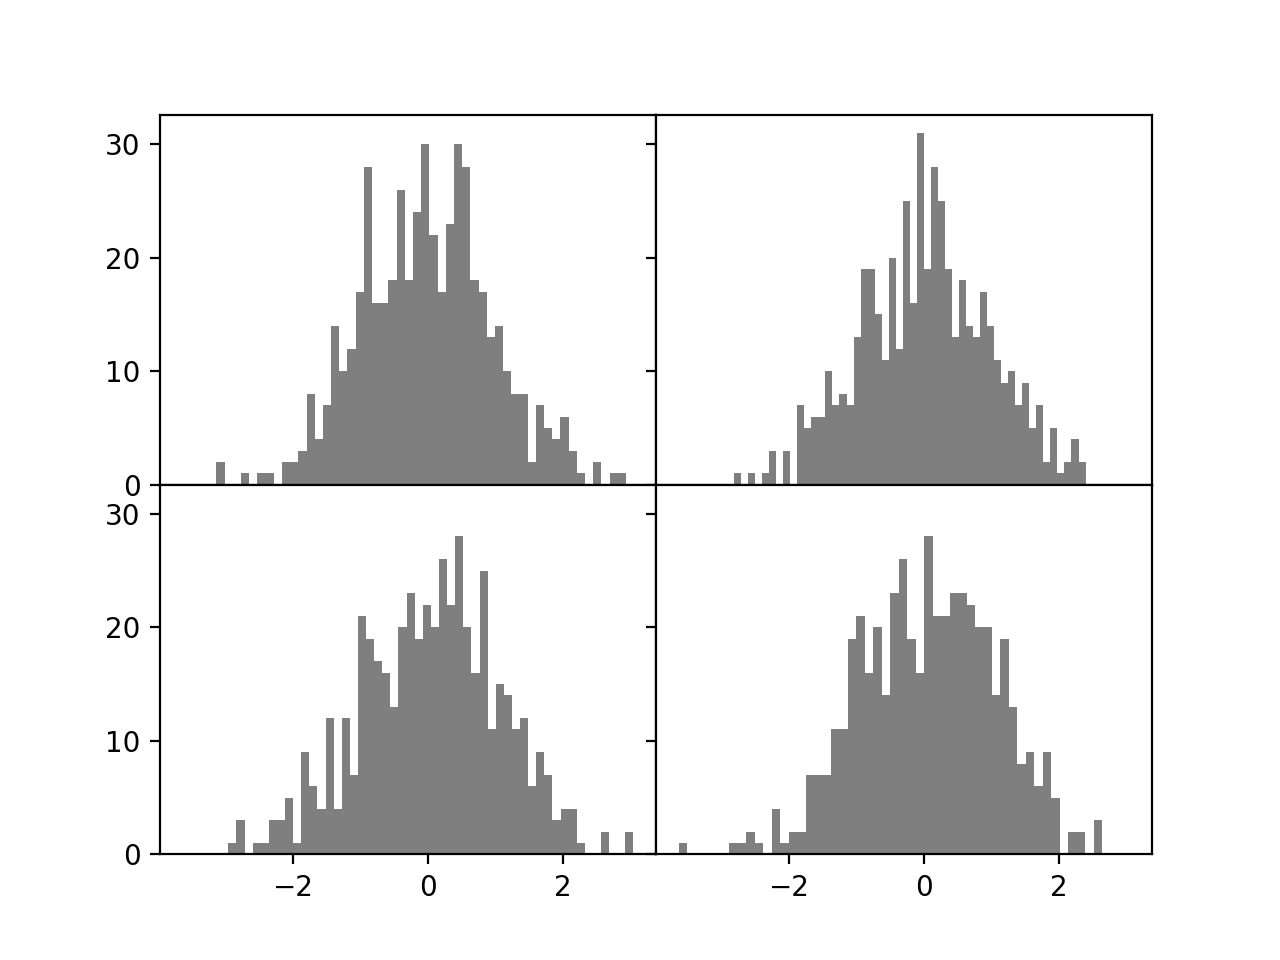

In [24]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color="k", alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 9.1.2 色、マーカー、線種

<IPython.core.display.Javascript object>


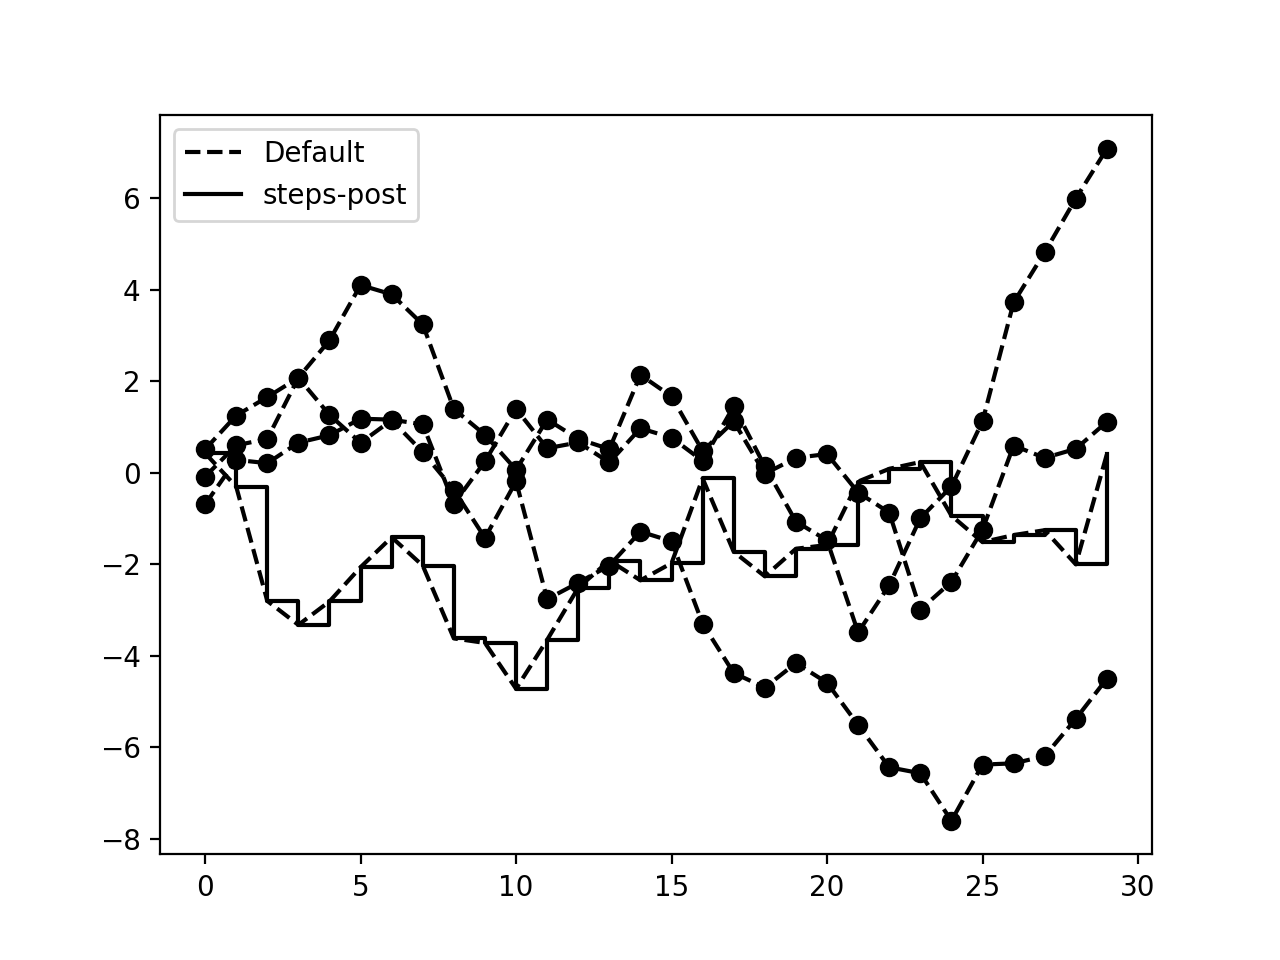

In [31]:
plt.plot(randn(30).cumsum(), "ko--")

In [33]:
plt.plot(randn(30).cumsum(), color="k", linestyle="dashed", marker="o")
### 上の図に追加された　なぜ？　%matplotlib notebook実行したから or plt.figure()実行してない

In [34]:
data = np.random.randn(30).cumsum()

In [35]:
plt.plot(data, "k--", label="Default")

In [36]:
plt.plot(data, "k-", drawstyle="steps-post", label="steps-post")

In [37]:
plt.legend(loc="best")

### 9.1.3 目盛り、ラベル、凡例

### 9.1.3.1 タイトル、軸のラベル、目盛り、目盛りのラベルを設定する

<IPython.core.display.Javascript object>


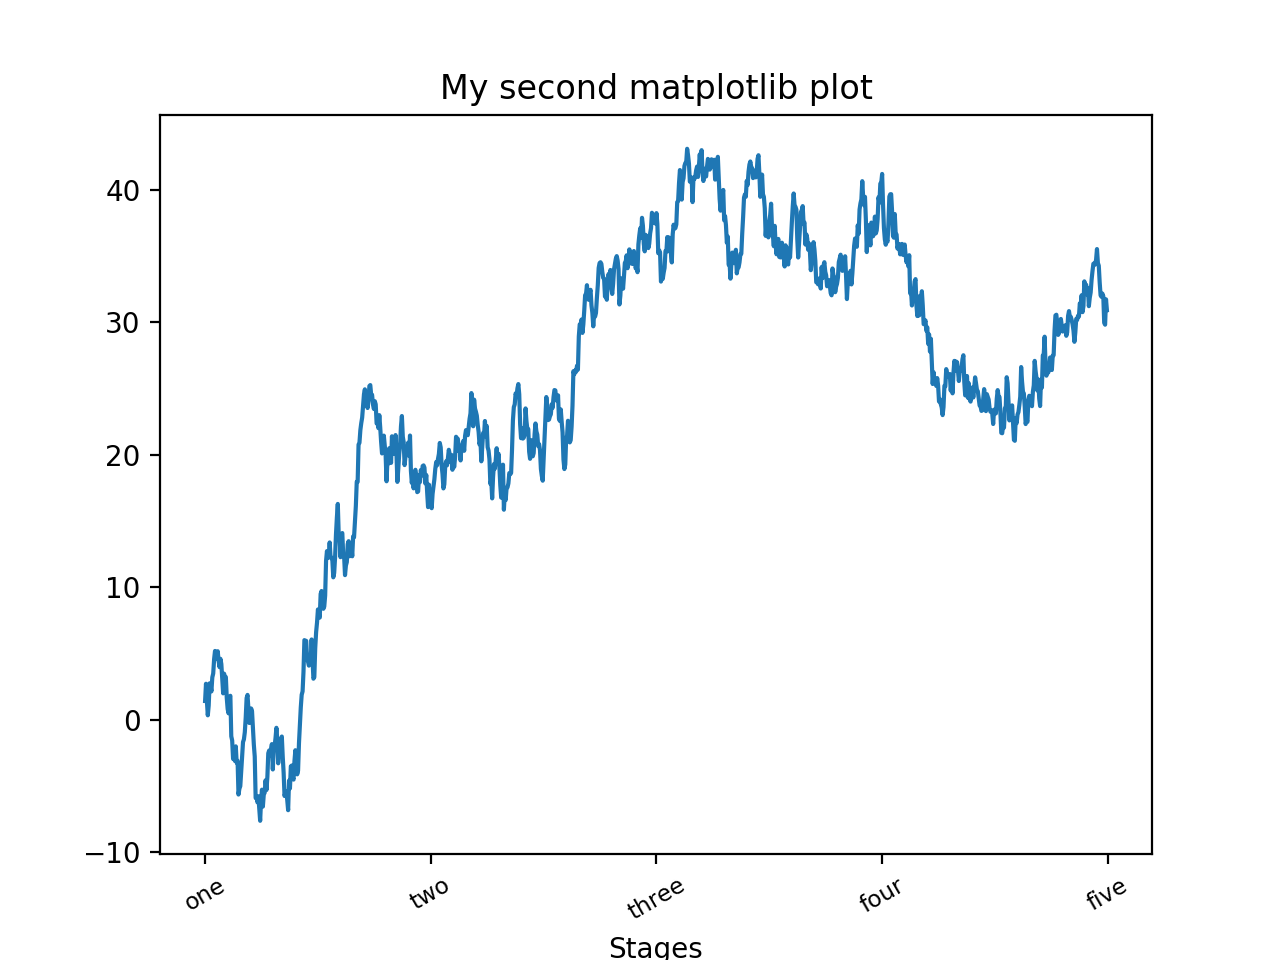

In [38]:
fig = plt.figure()

In [39]:
ax = fig.add_subplot(1, 1, 1)

In [40]:
ax.plot(np.random.randn(1000).cumsum())

In [41]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [42]:
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                                               rotation=30, fontsize="small")

In [43]:
ax.set_title("My first matplotlib plot")

Text(0.5, 1.0, 'My first matplotlib plot')

In [45]:
ax.set_xlabel("Stages")

Text(0.5, 24.188360157402354, 'Stages')

In [46]:
props = {
    "title": "My second matplotlib plot",
    "xlabel": "Stages"
}
ax.set(**props)

[Text(0.5, 24.188360157402354, 'Stages'),
 Text(0.5, 1.0, 'My second matplotlib plot')]

### 9.1.3.2 凡例の追加

<IPython.core.display.Javascript object>


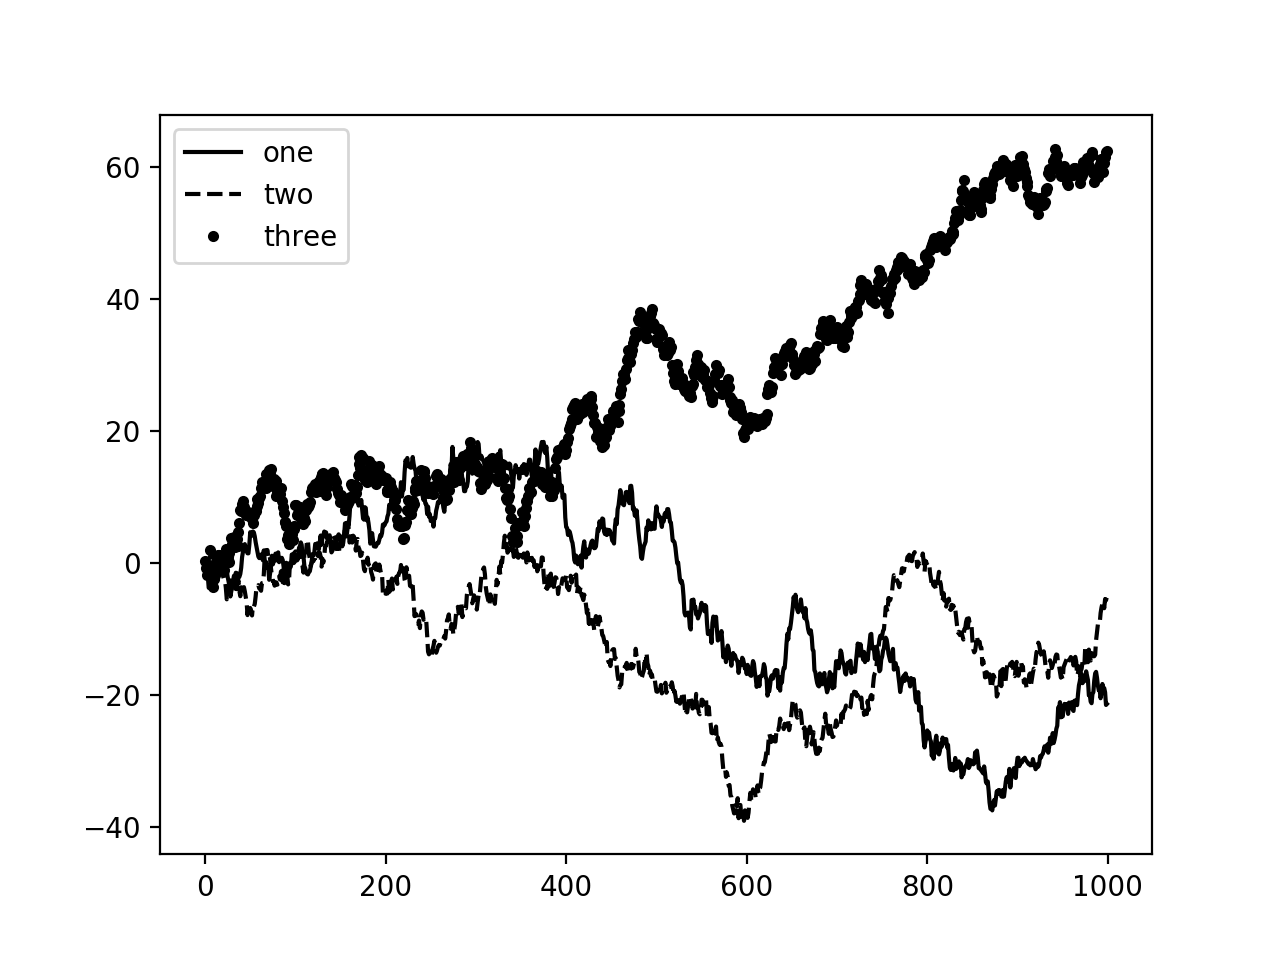

In [47]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [48]:
ax.plot(randn(1000).cumsum(), "k", label="one")

In [49]:
ax.plot(randn(1000).cumsum(), "k--", label="two")

In [50]:
ax.plot(randn(1000).cumsum(), "k.", label="three")

In [51]:
ax.legend(loc="best")

### 9.1.4 サブプロットへの注釈や描画

<IPython.core.display.Javascript object>


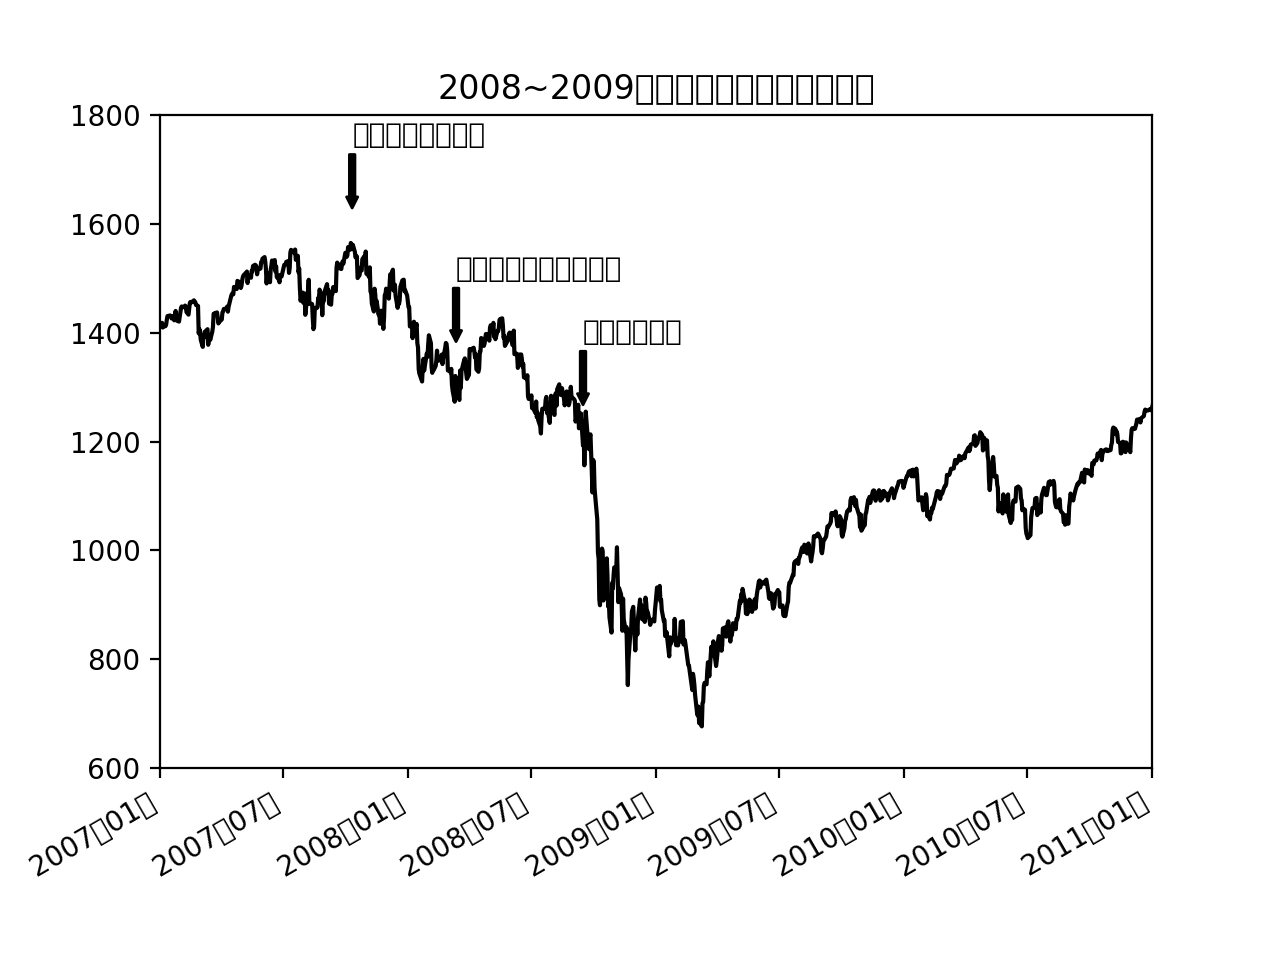

Text(0.5, 1.0, '2008~2009年の金融危機の重要な日付')

In [3]:
# 日本語フォントの設定
font_options = {"family": "IPAPGothic"}
plt.rc("font", **font_options)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, style="k-")

crisis_data = [
    (datetime(2007, 10, 11), "上昇相場のピーク"),
    (datetime(2008, 3, 12), "ベア・スターンズ危機"),
    (datetime(2008, 9, 15), "リーマン破綻")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                           xytext=(date, spx.asof(date) + 235),
                           arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                                         headlength=4),
                           horizontalalignment="left", verticalalignment="top")

# X軸のラベルの日付表記を日本語に
datefmt = dates.DateFormatter("%Y年%m月")
ax.xaxis.set_major_formatter(datefmt)

# 2007~2010年をズーム
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("2008~2009年の金融危機の重要な日付")

<IPython.core.display.Javascript object>


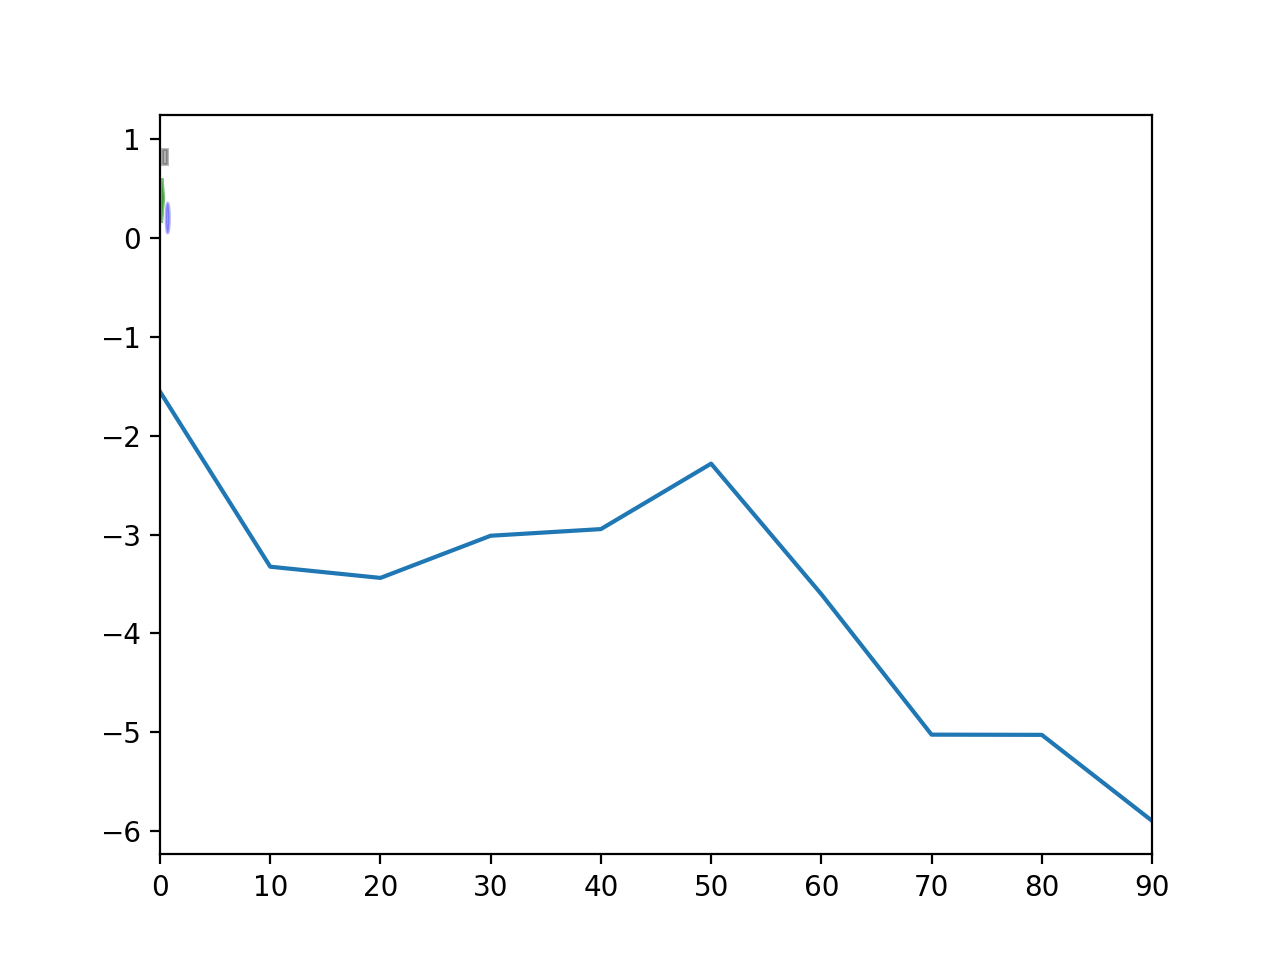

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="k", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="b", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="g", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 プロットのファイルへの保存

### 9.1.6 Matplotlibの設定

## 9.2 pandasとeabornのプロット関数

### 9.2.1 折れ線グラフ

<IPython.core.display.Javascript object>


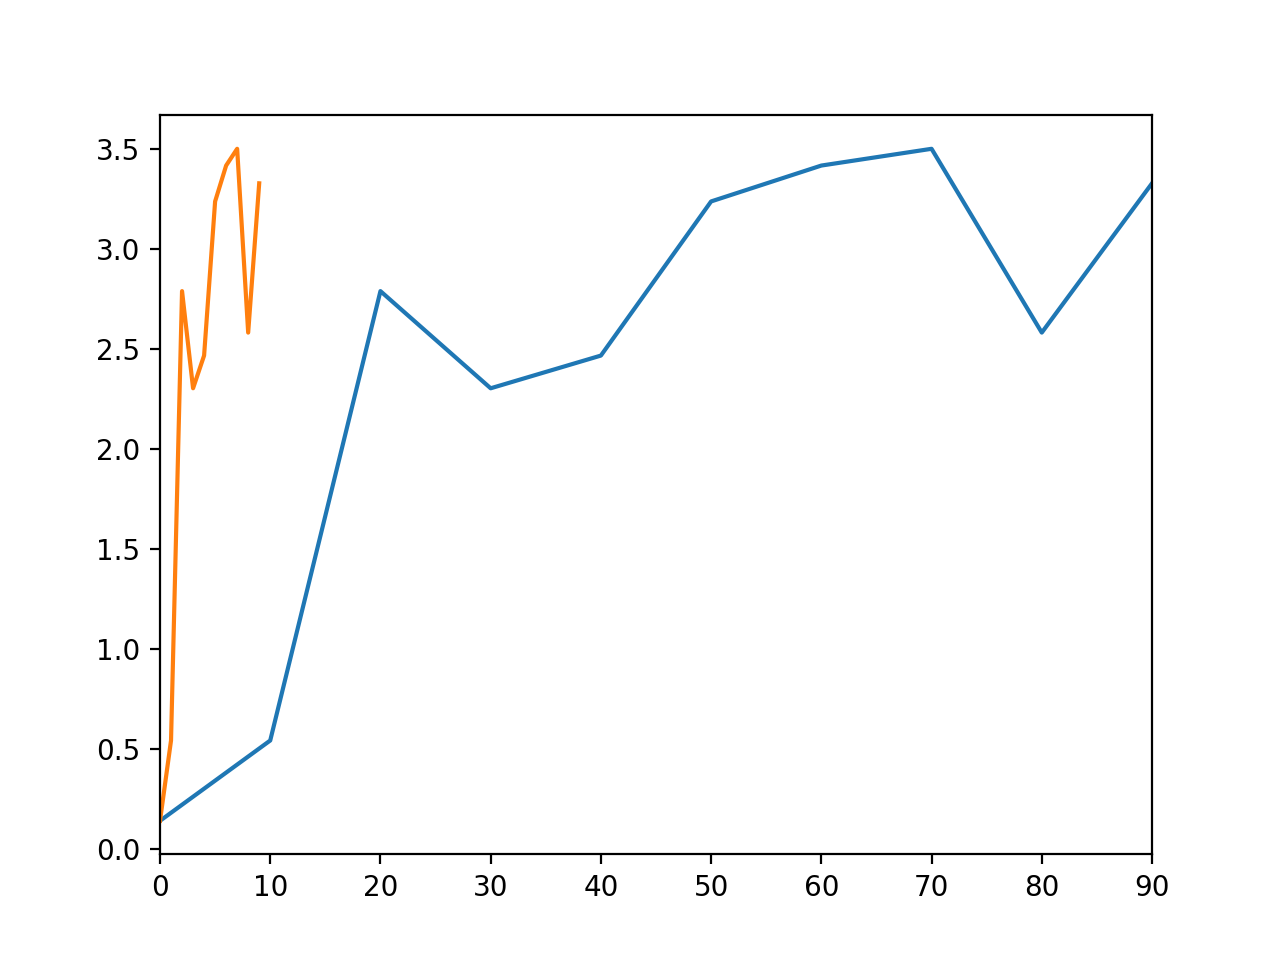

In [8]:
fig = plt.figure()
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [9]:
s.plot()

In [11]:
###
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100, 10))

TypeError: __init__() got an unexpected keyword argument 'use_index'

In [12]:
s.plot(use_index=False)

<IPython.core.display.Javascript object>


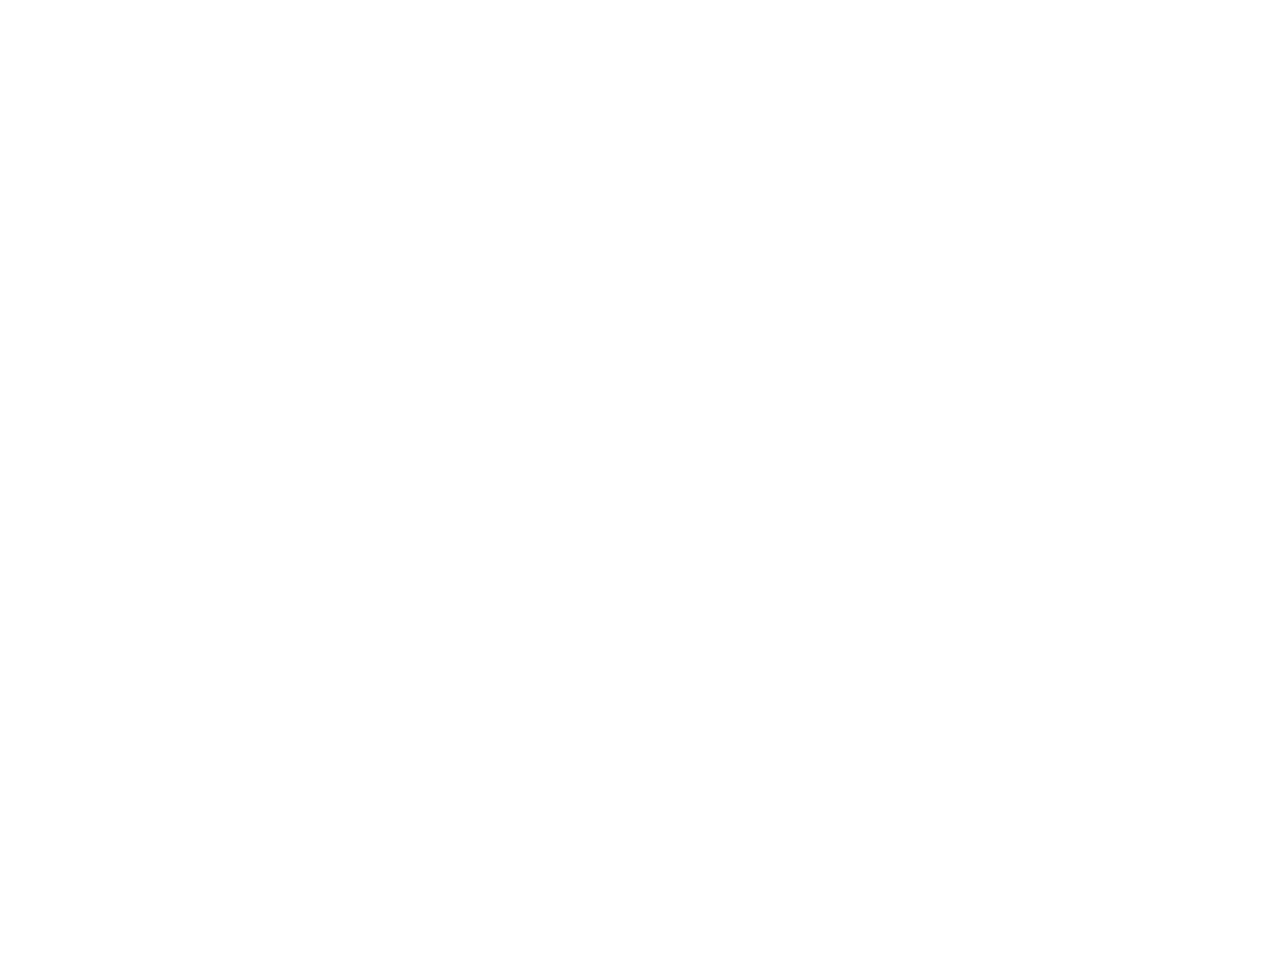

<IPython.core.display.Javascript object>


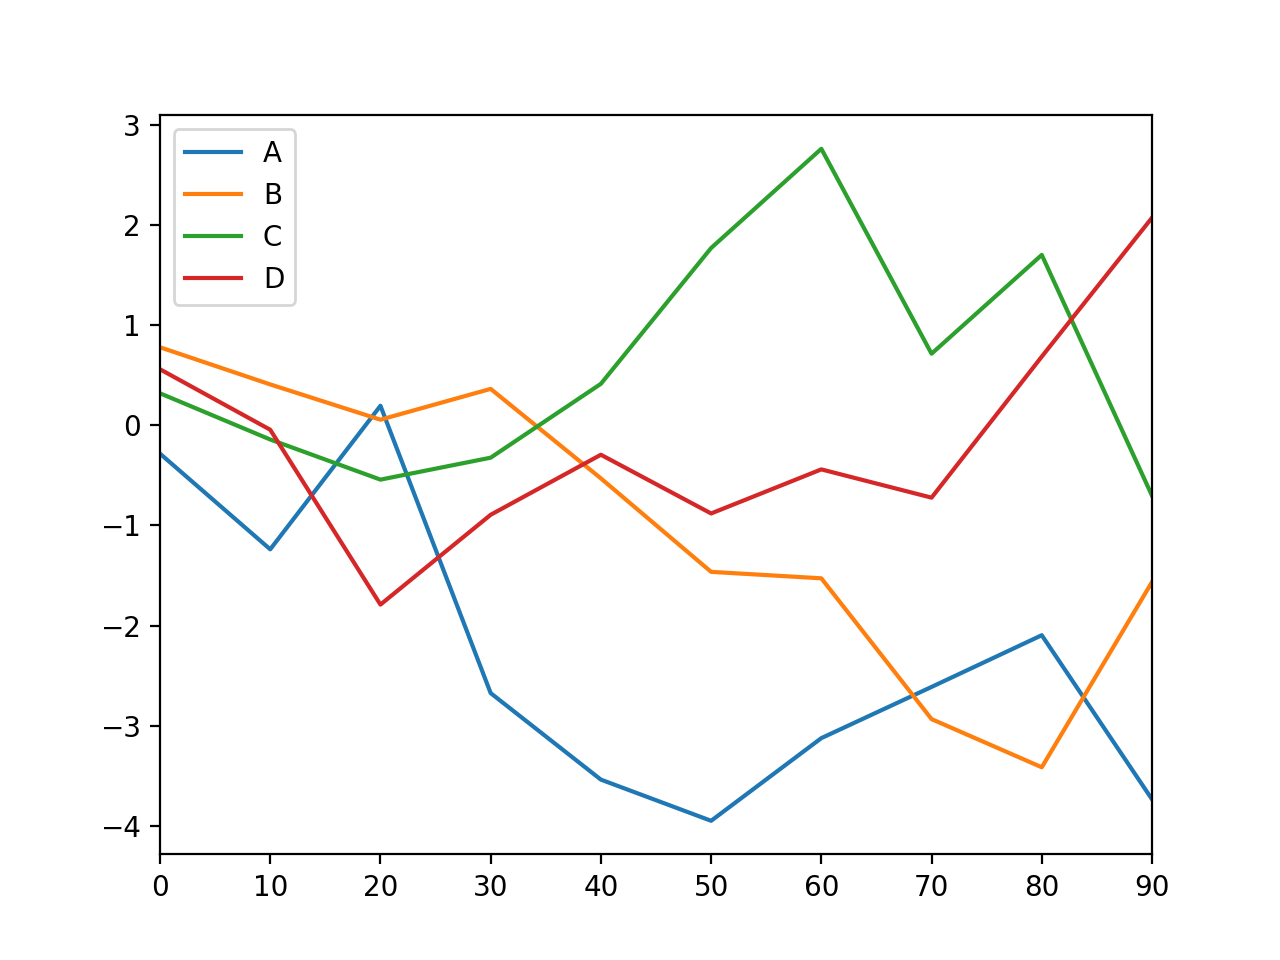

In [20]:
fig = plt.figure()
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                                   columns=["A", "B", "C", "D"],
                                    index=np.arange(0, 100, 10))
df.plot()

###  9.2.2 棒グラフ

<IPython.core.display.Javascript object>


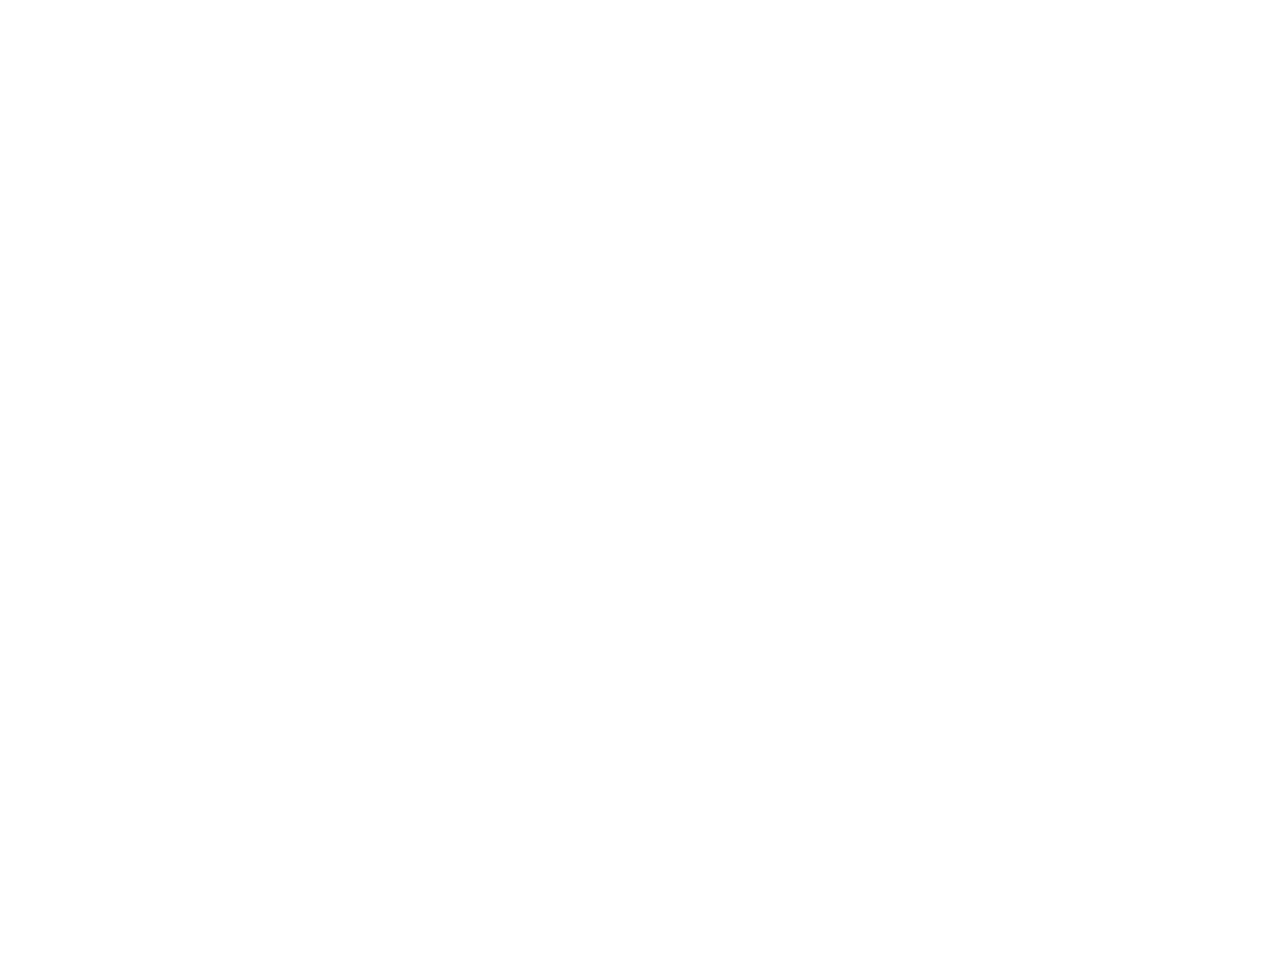

<IPython.core.display.Javascript object>


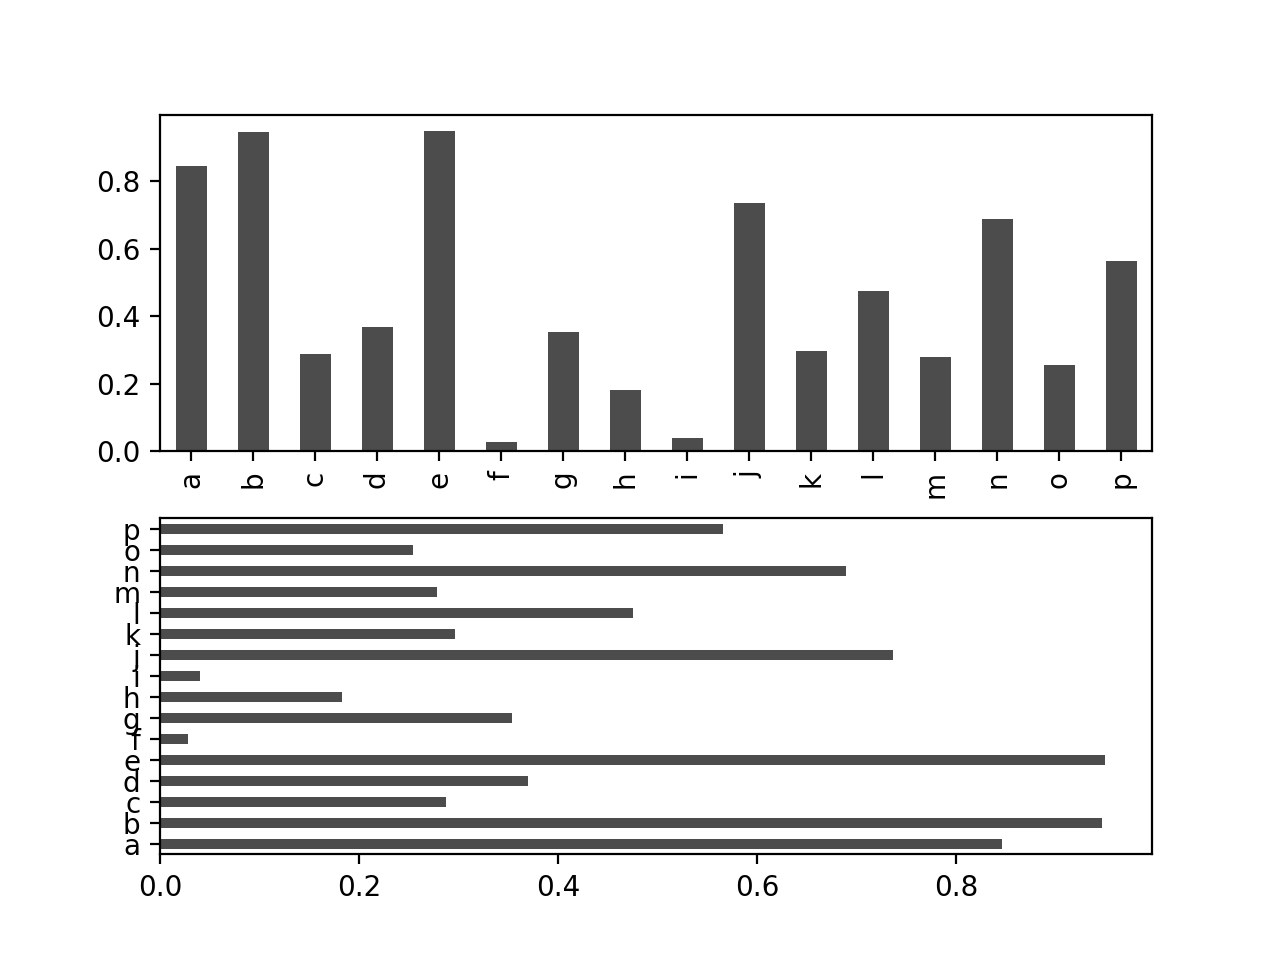

In [25]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="k", alpha=0.7)
data.plot.barh(ax=axes[1], color="k", alpha=0.7)

In [29]:
df = pd.DataFrame(np.random.rand(6, 4),
                                  index=["one", "two", "three", "four", "five", "six"],
                                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

In [27]:
df

Genus         A         B         C         D
one    0.954159  0.549267  0.720979  0.557785
two    0.247789  0.748965  0.115383  0.156610
three  0.414568  0.907734  0.338332  0.383619
four   0.484682  0.873344  0.235564  0.489544
five   0.867744  0.973344  0.901165  0.110031
six    0.237119  0.077608  0.481705  0.642406

<IPython.core.display.Javascript object>


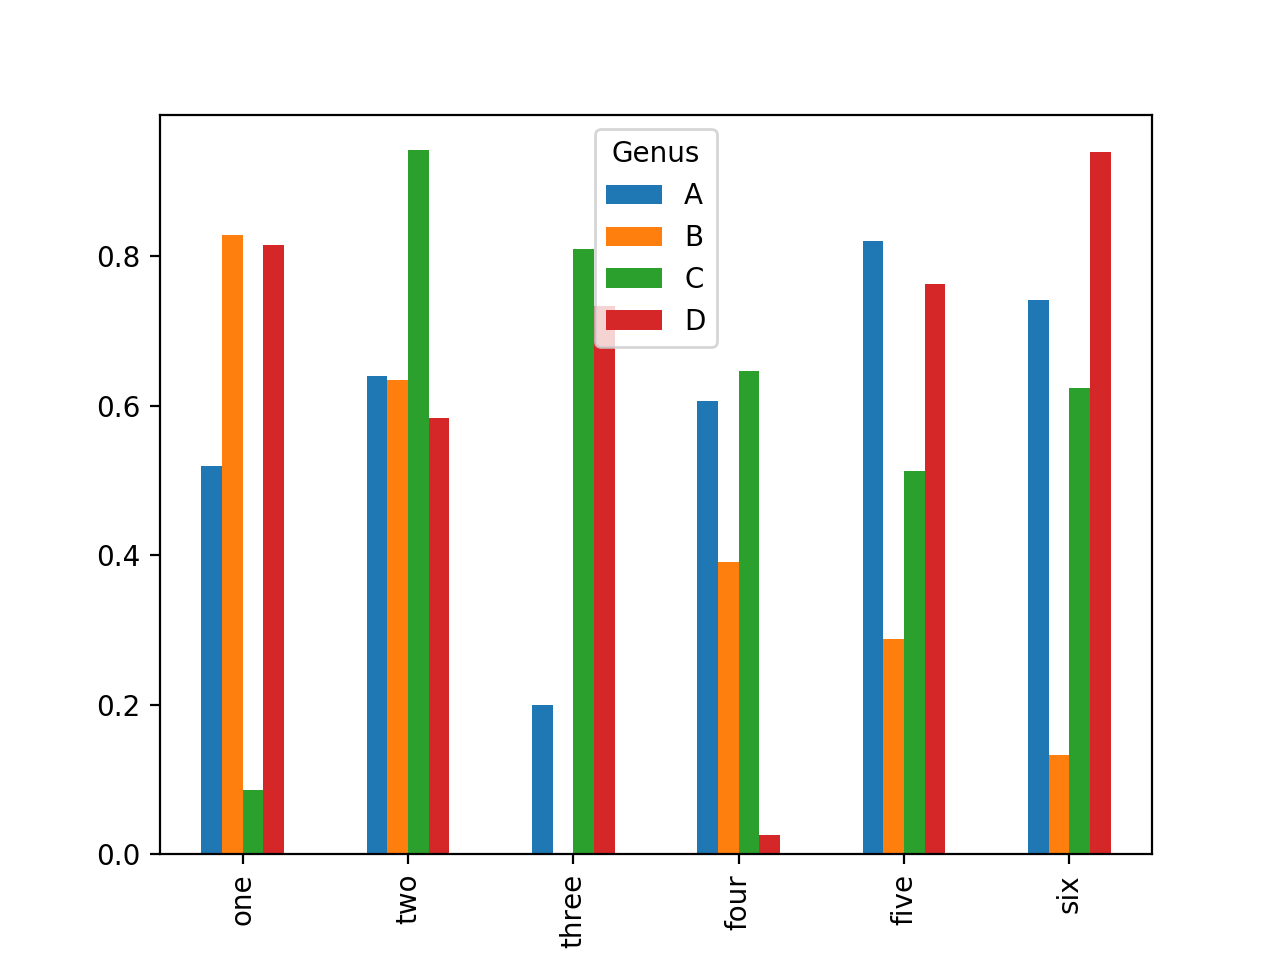

In [30]:
df.plot.bar()

<IPython.core.display.Javascript object>


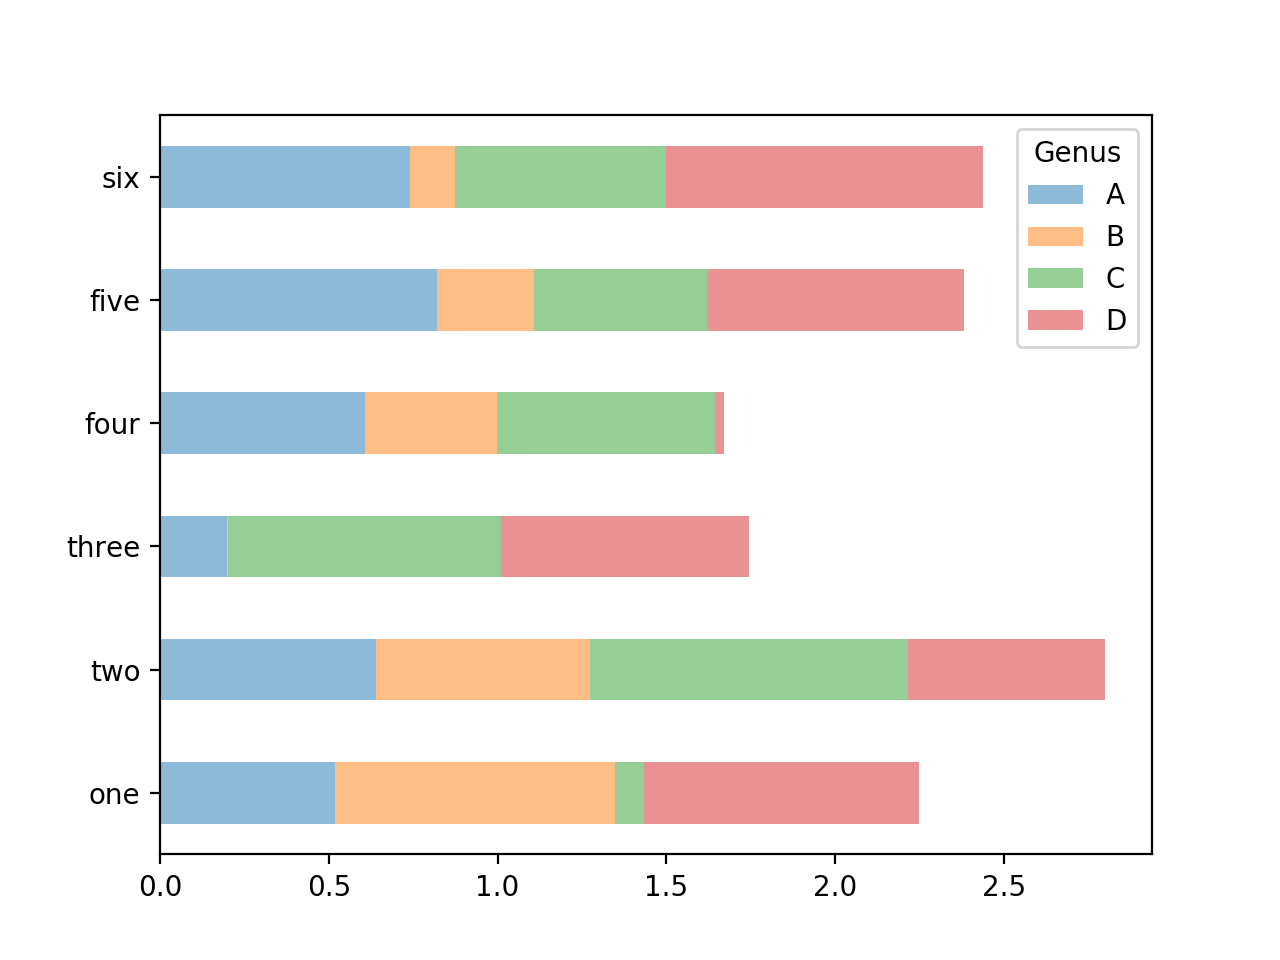

In [31]:
df.plot.barh(stacked=True, alpha=0.5)

In [32]:
tips = pd.read_csv("tips.csv")

In [33]:
party_counts = pd.crosstab(tips["day"], tips["size"])

In [34]:
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [35]:
party_counts = party_counts.loc[:, 2:5]

In [36]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [37]:
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

<IPython.core.display.Javascript object>


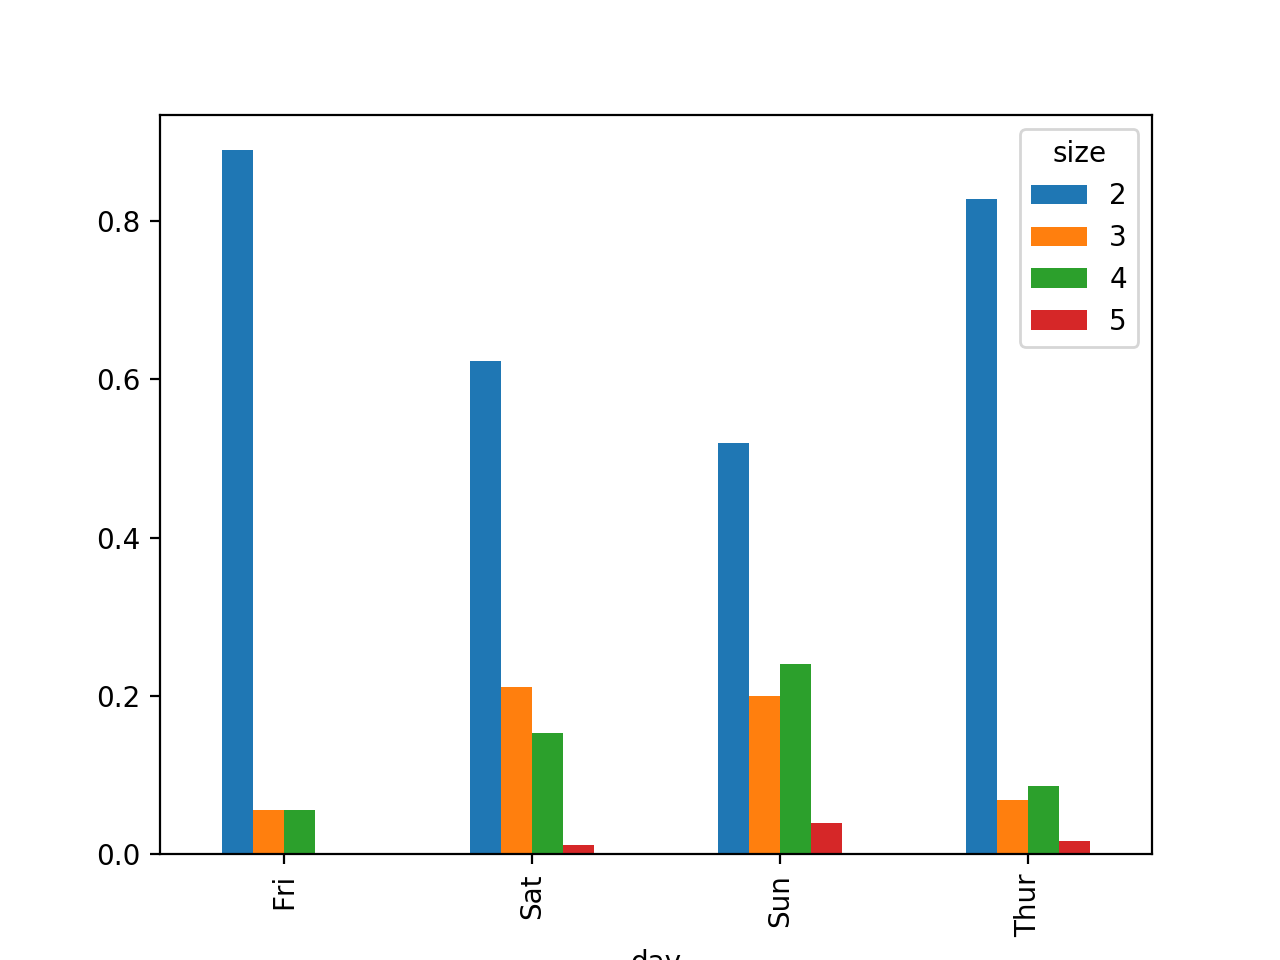

In [38]:
party_pcts.plot.bar()

In [41]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

In [42]:
tips.head()

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069

<IPython.core.display.Javascript object>


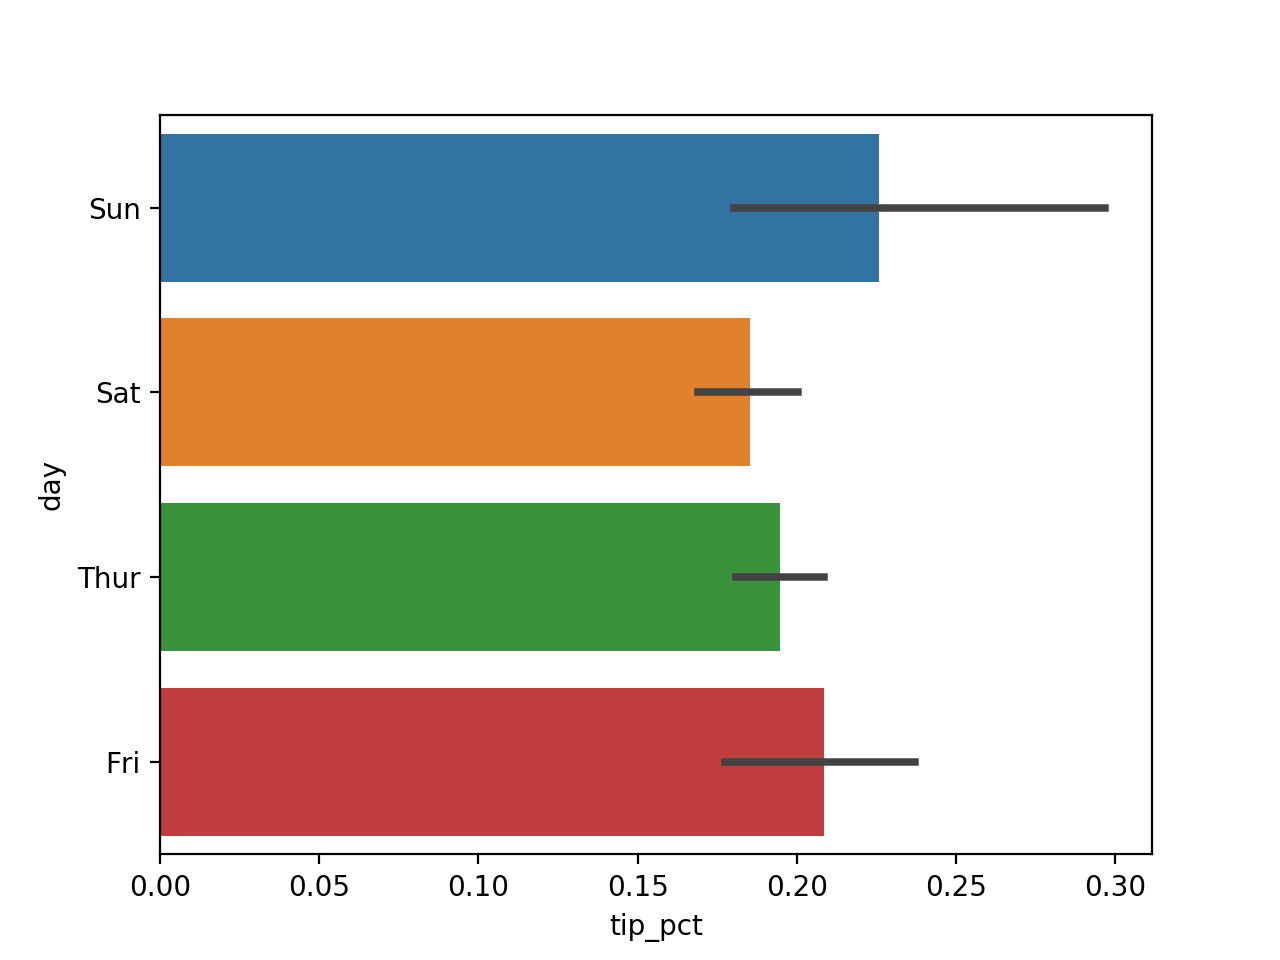

In [46]:
sns.barplot(x="tip_pct", y="day",  data=tips, orient="h")

<IPython.core.display.Javascript object>


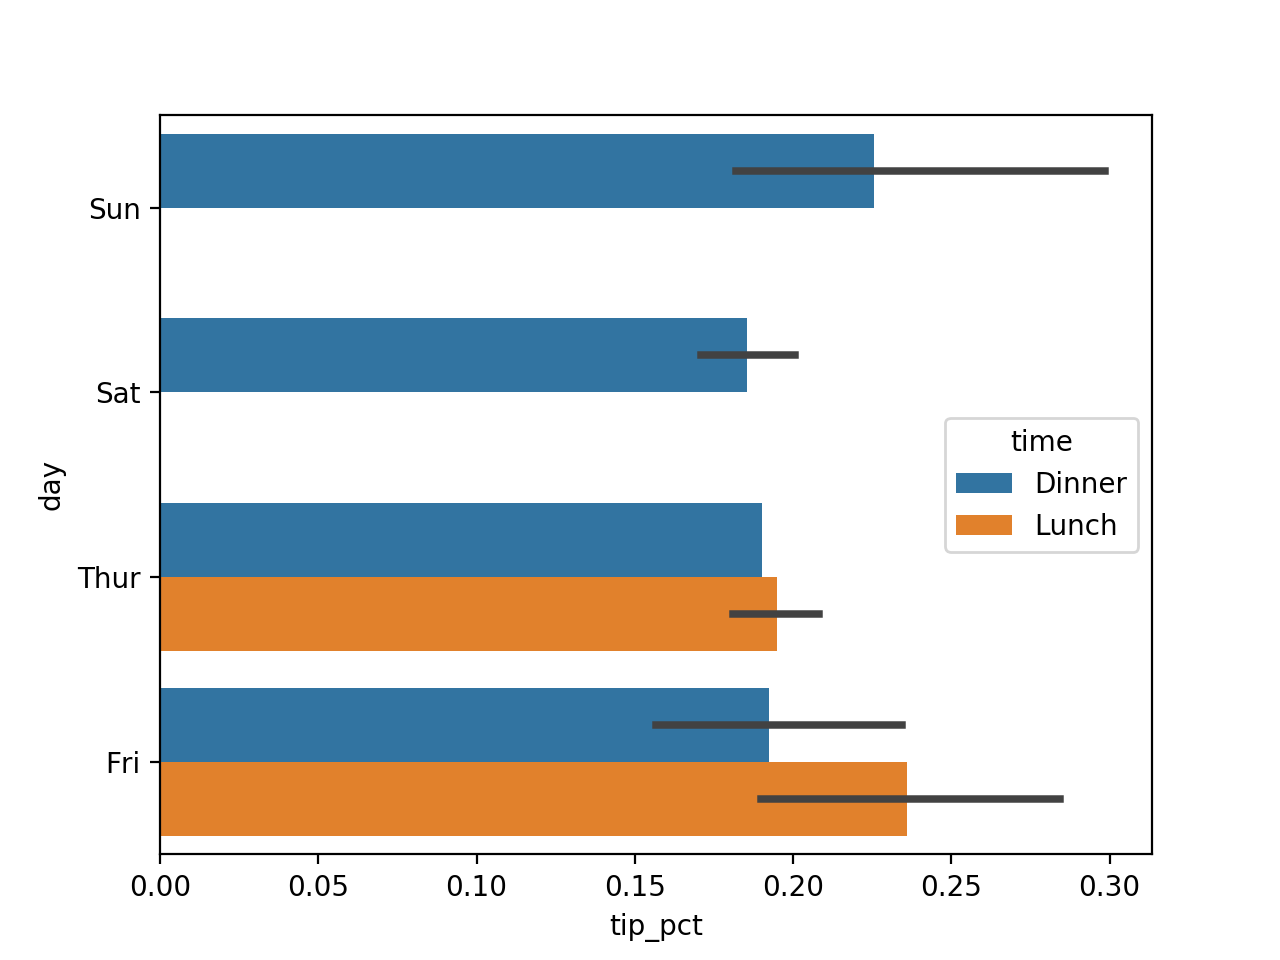

In [47]:
fig = plt.figure()
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

<IPython.core.display.Javascript object>


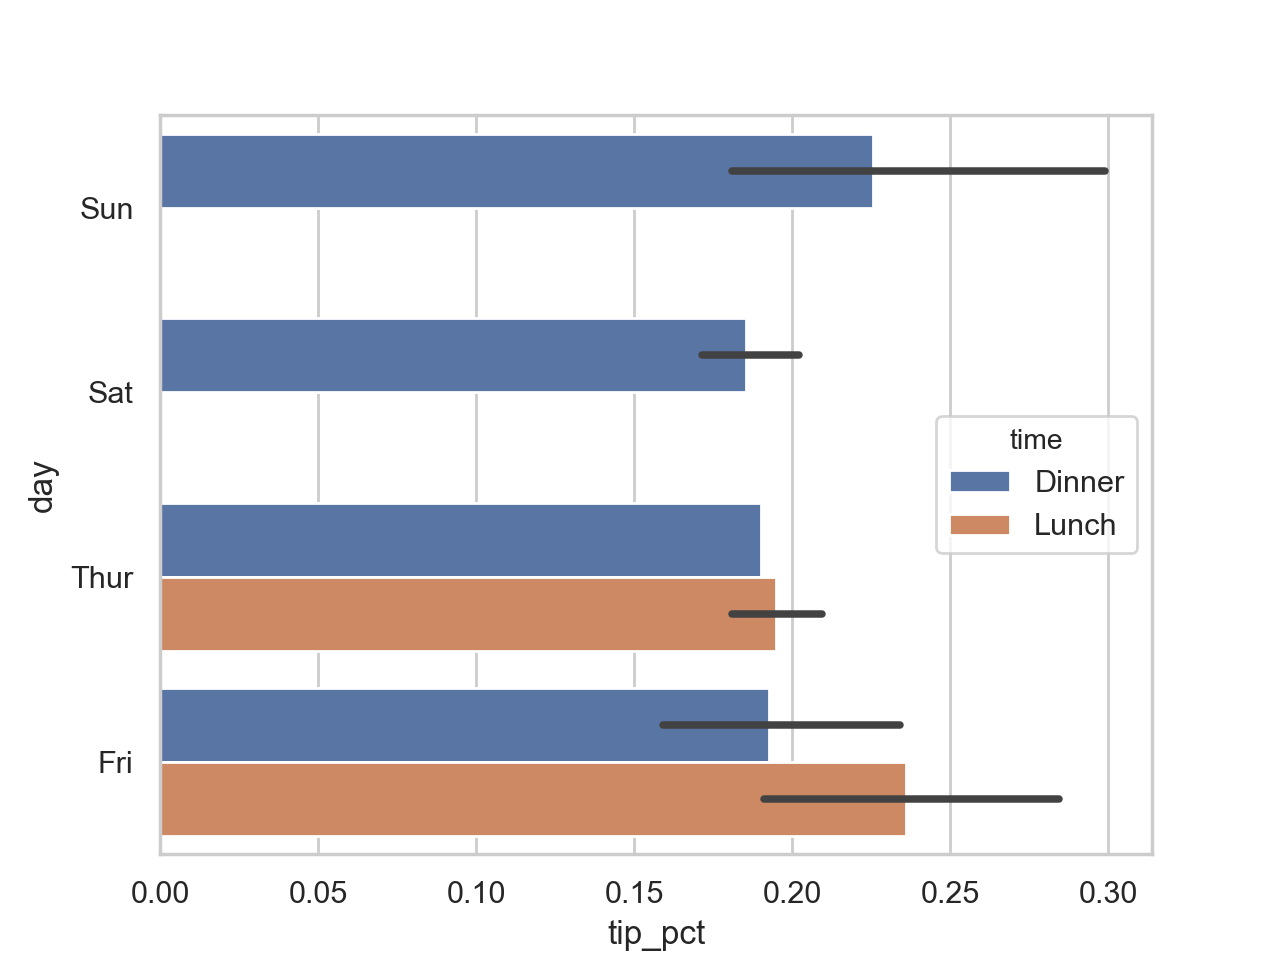

In [51]:
###
sns.set(style="whitegrid")
fig = plt.figure()
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

### 9.2.3 ヒストグラムと密度プロット

<IPython.core.display.Javascript object>


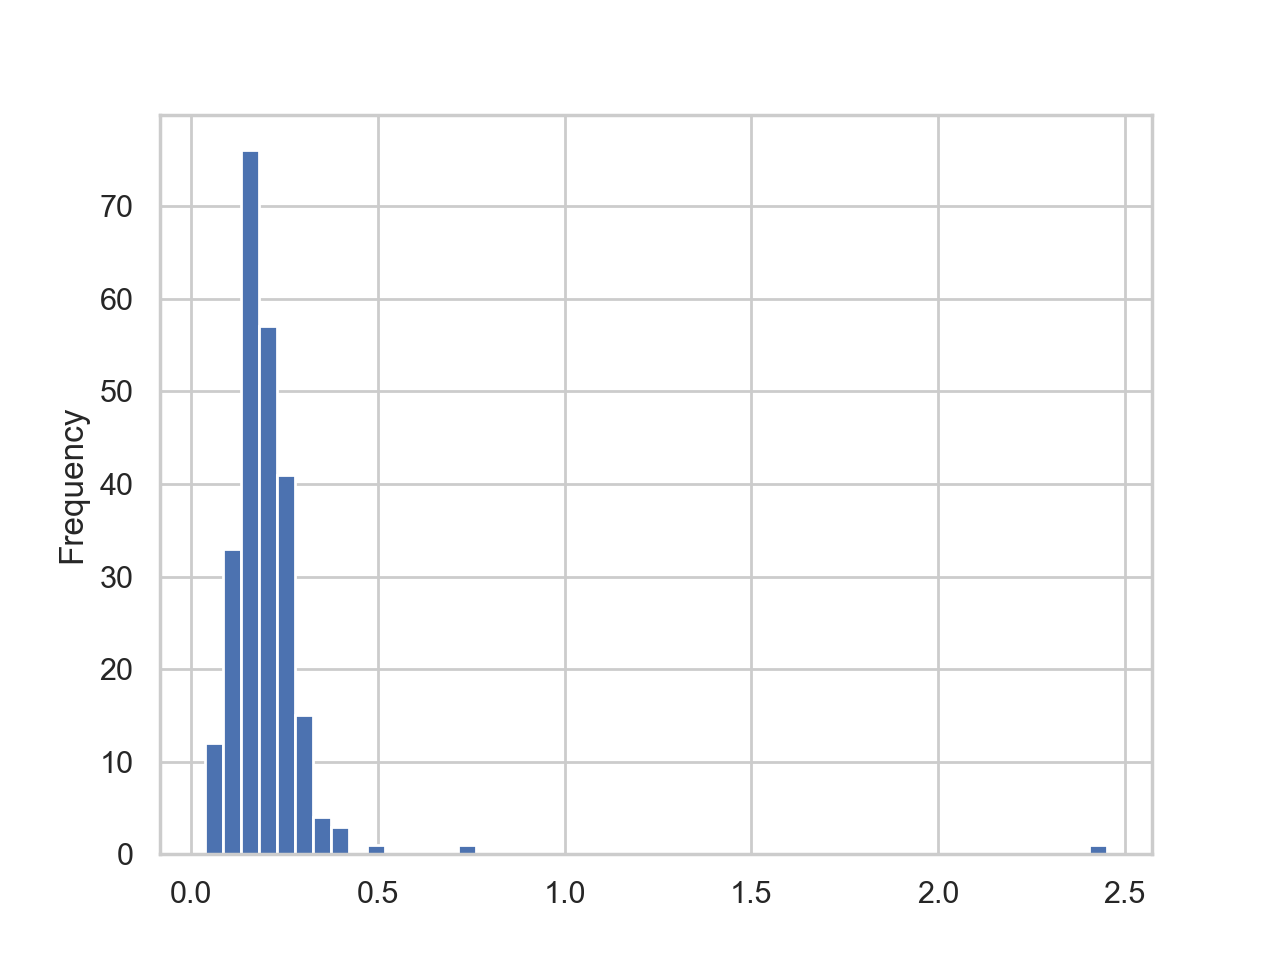

In [52]:
fig = plt.figure()
tips["tip_pct"].plot.hist(bins=50)

<IPython.core.display.Javascript object>


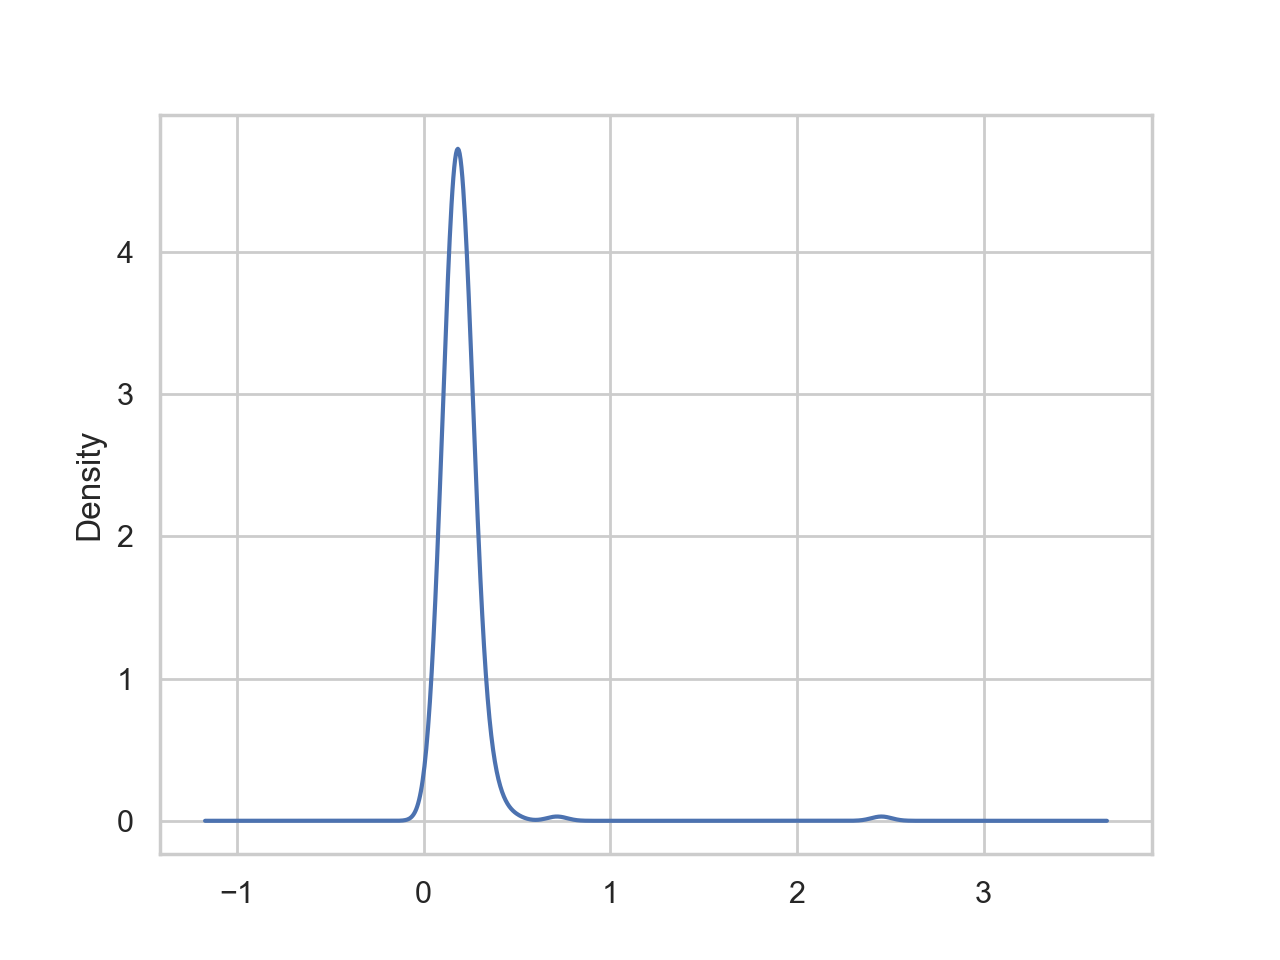

In [54]:
fig =plt.figure()
tips["tip_pct"].plot.density()

In [55]:
comp1 = np.random.normal(0, 1, size=200)

In [56]:
comp2 =  np.random.normal(10, 2, size=200)

In [57]:
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


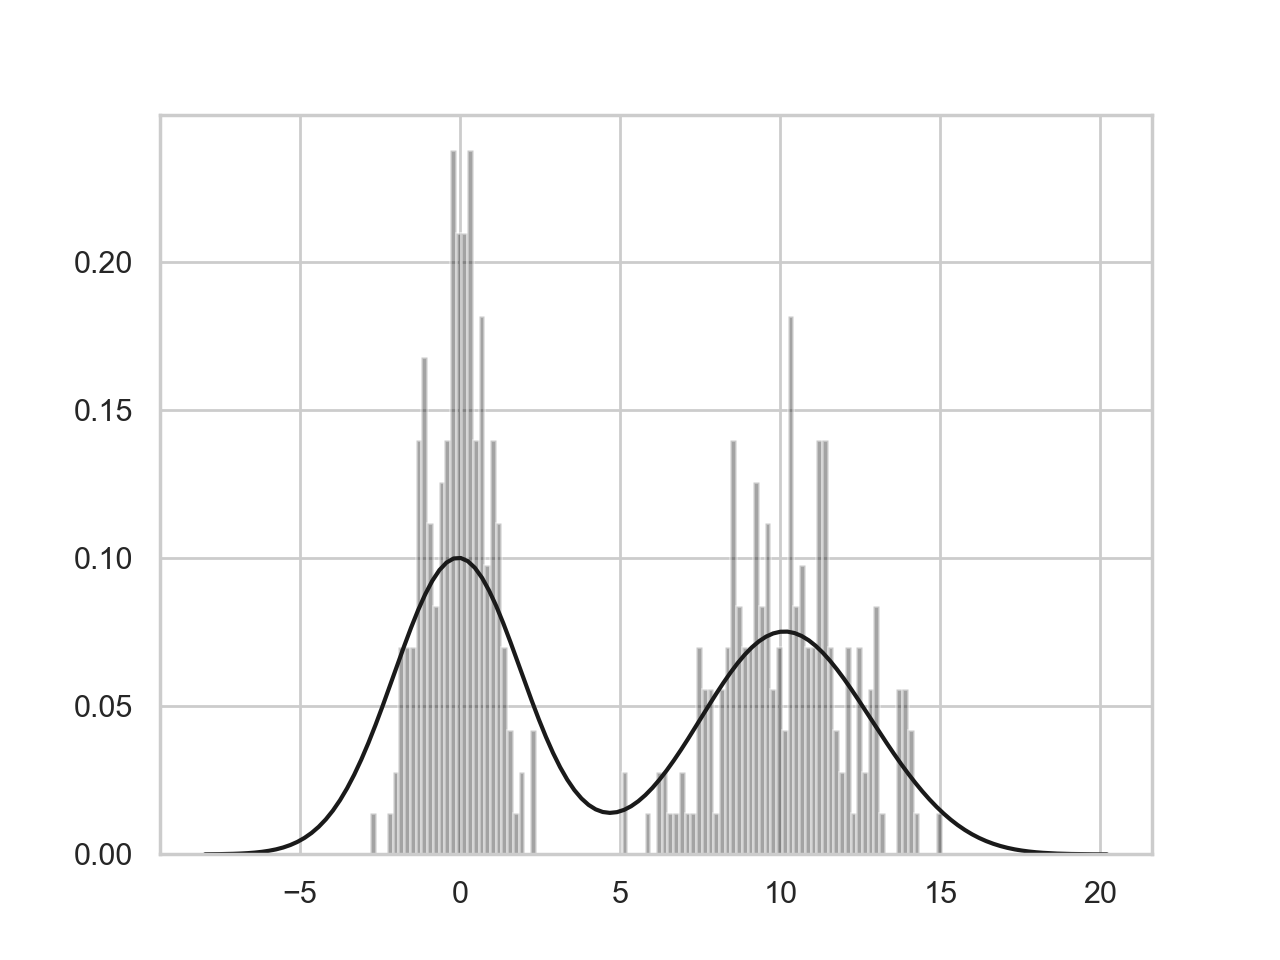

In [58]:
fig = plt.figure()
sns.distplot(values, bins=100, color="k")

### 9.2.4 散布図

In [60]:
macro = pd.read_csv("macrodata.csv")

In [62]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

In [63]:
trans_data = np.log(data).diff().dropna()

In [64]:
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

<IPython.core.display.Javascript object>


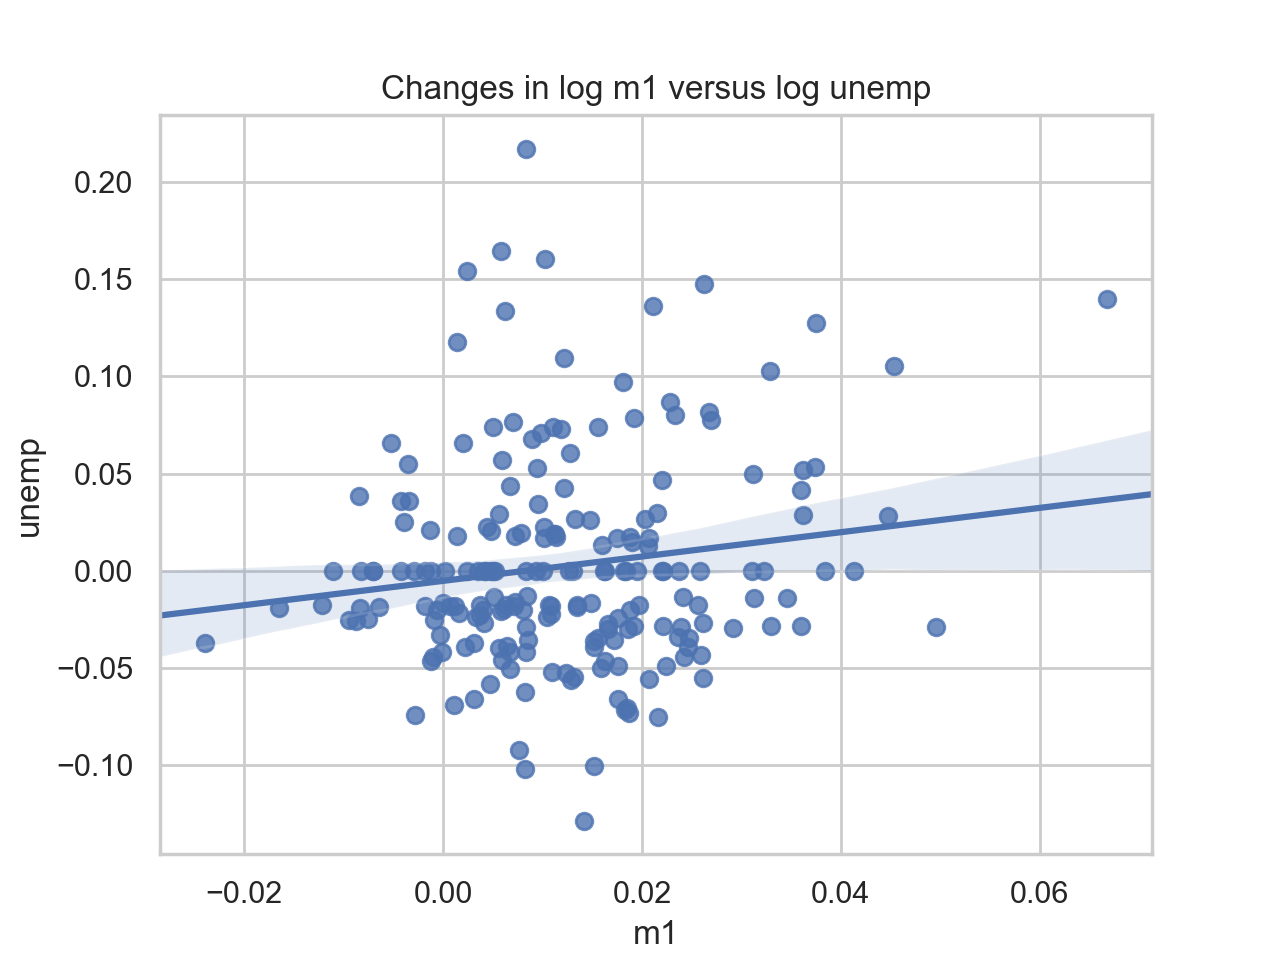

In [66]:
fig = plt.figure()
sns.regplot("m1", "unemp", data=trans_data)

In [67]:
plt.title("Changes in log %s versus log %s" % ("m1", "unemp"))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

<IPython.core.display.Javascript object>


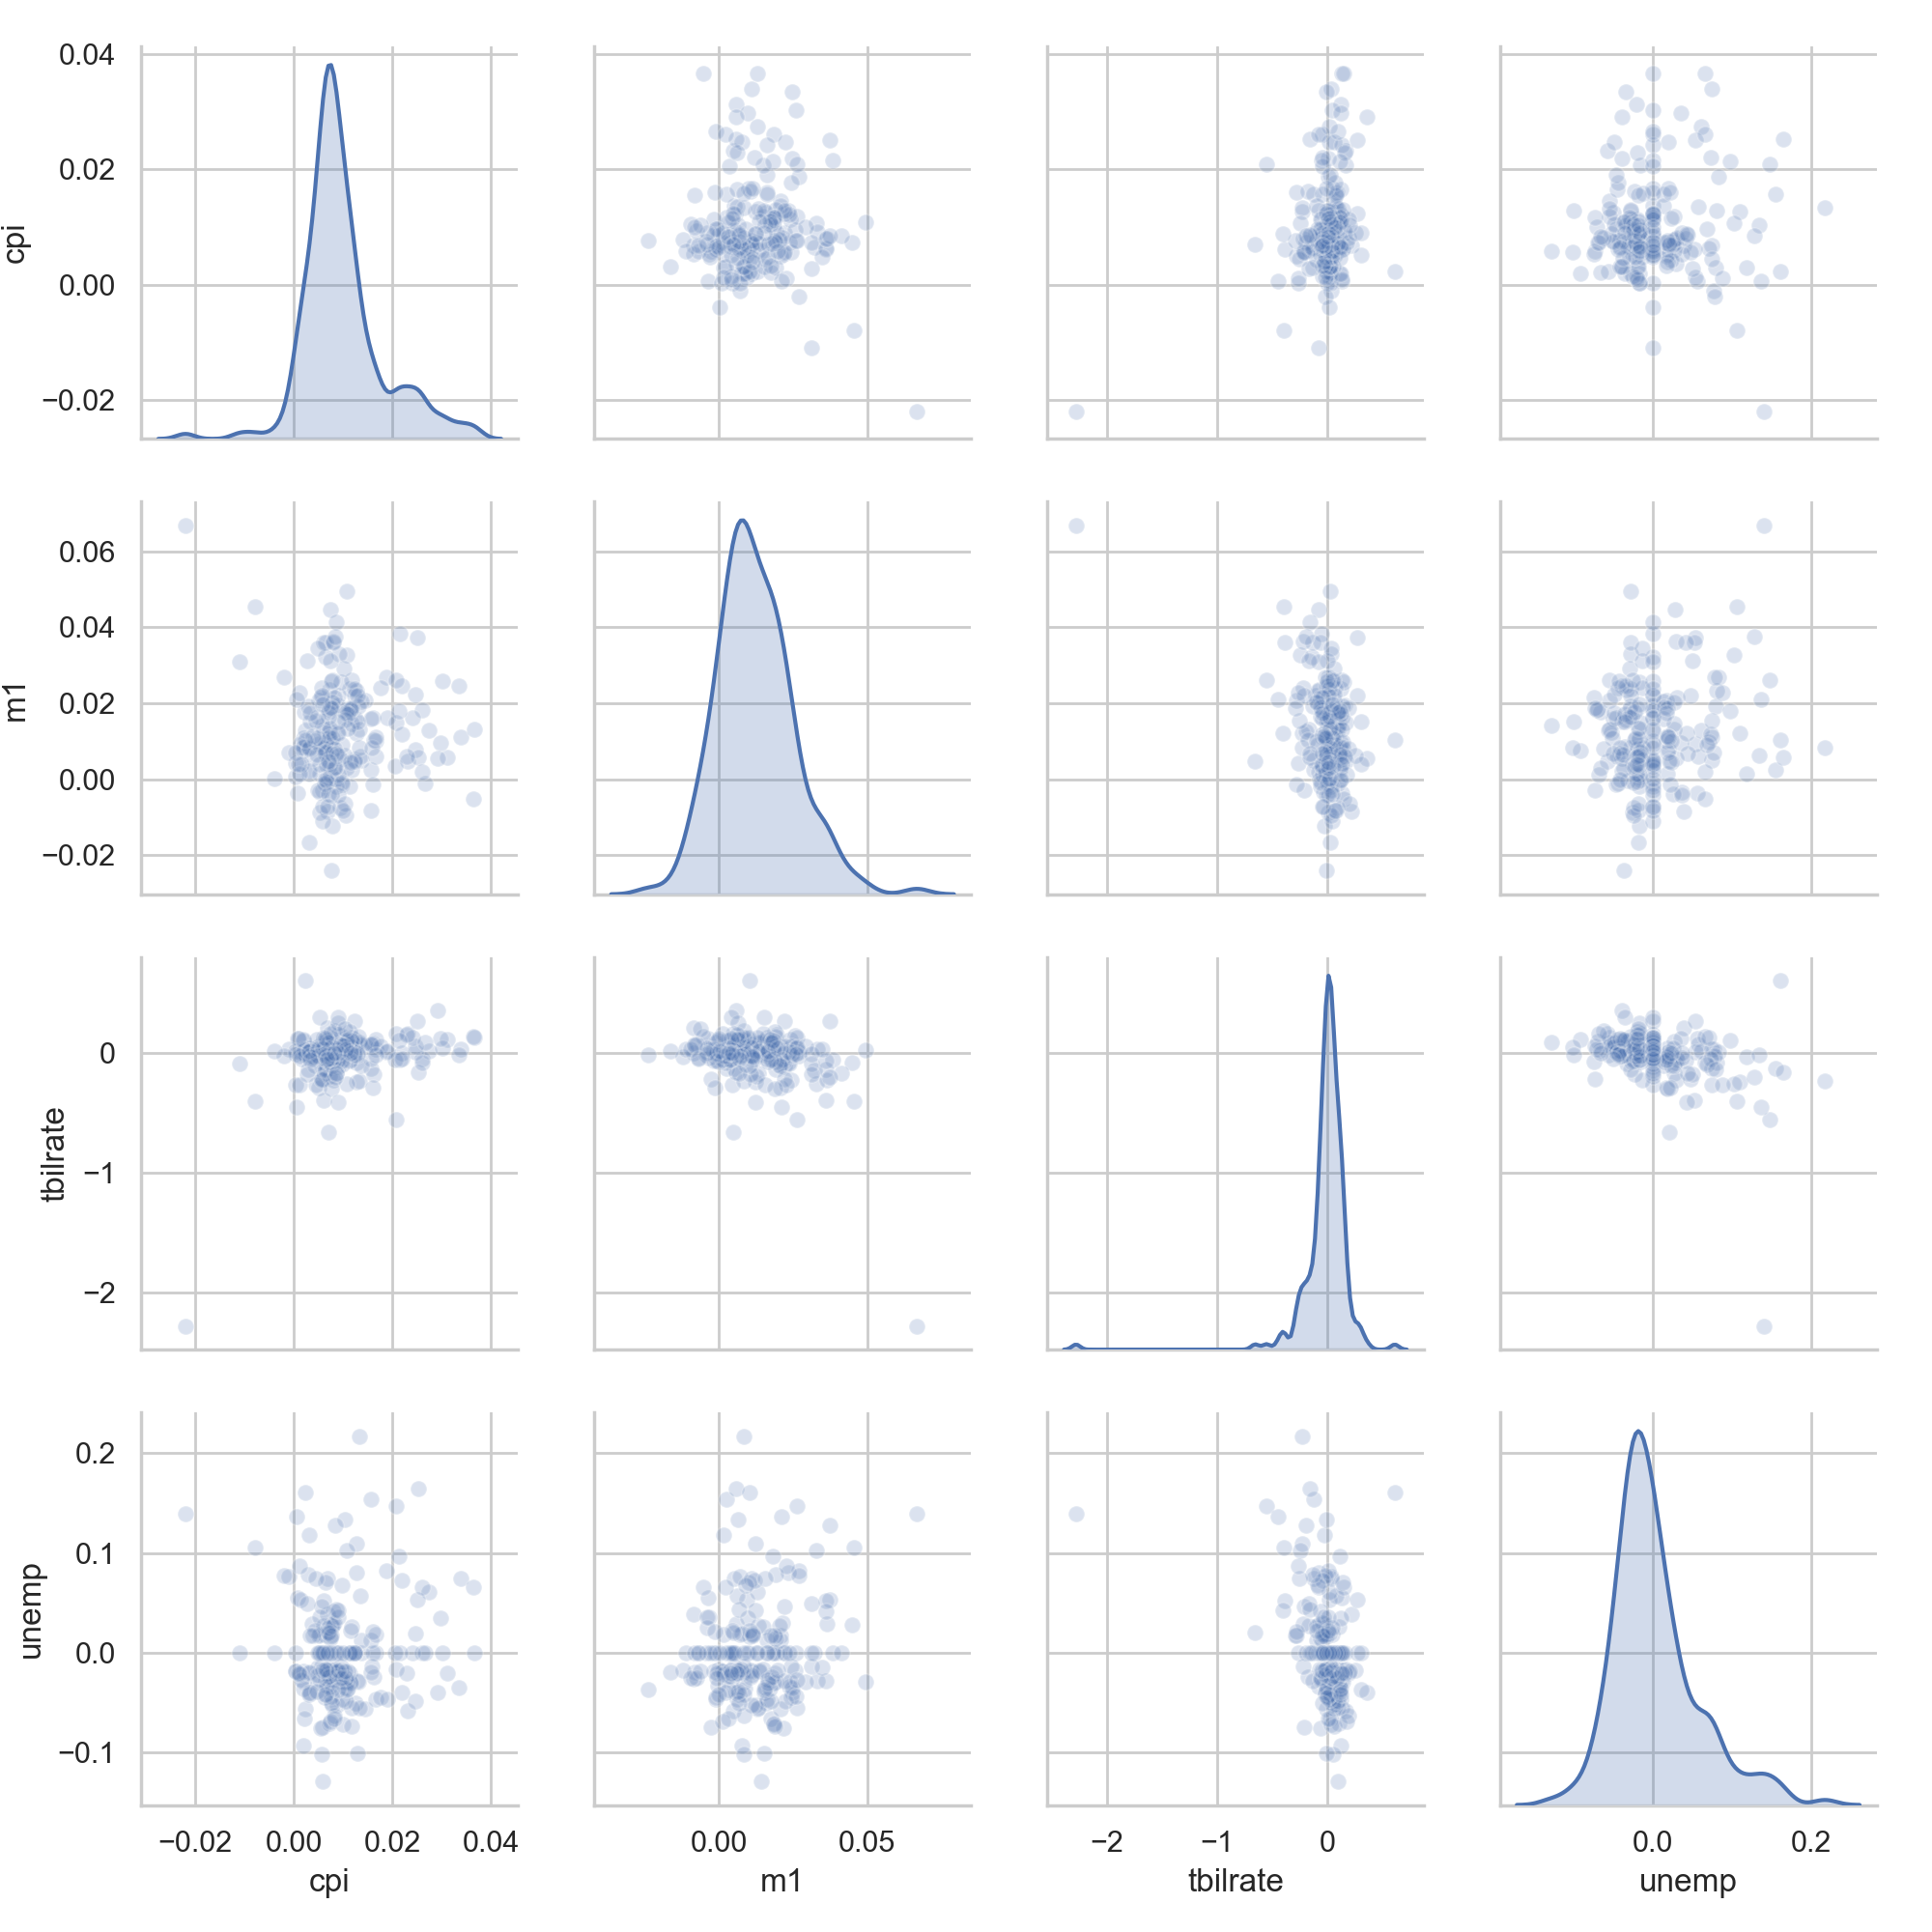

In [73]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha":0.2})

### 9.2.5 ファセットグリッドとカテゴリ型データ

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


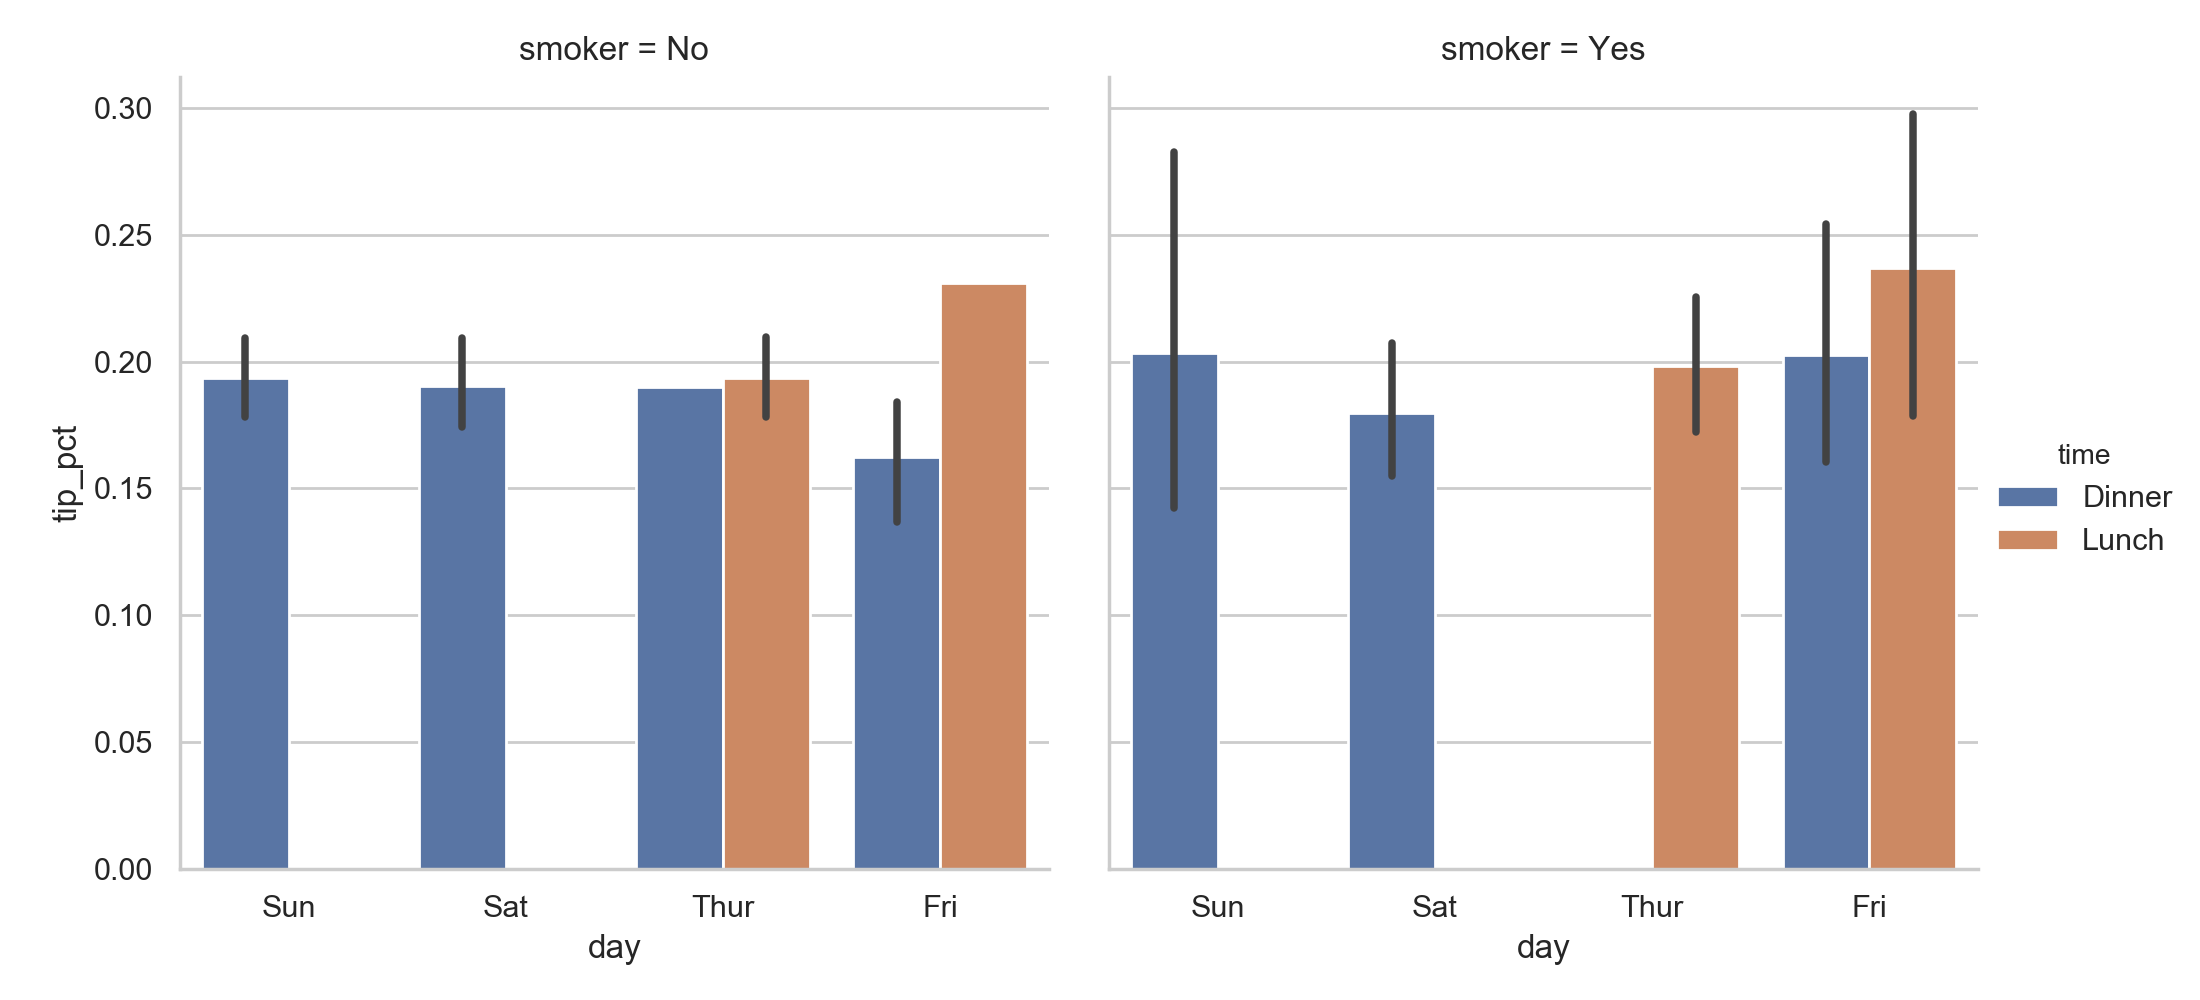

In [72]:
sns.factorplot(x="day", y="tip_pct", hue="time", col="smoker",
                          kind="bar", data=tips[tips.tip_pct < 1])

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


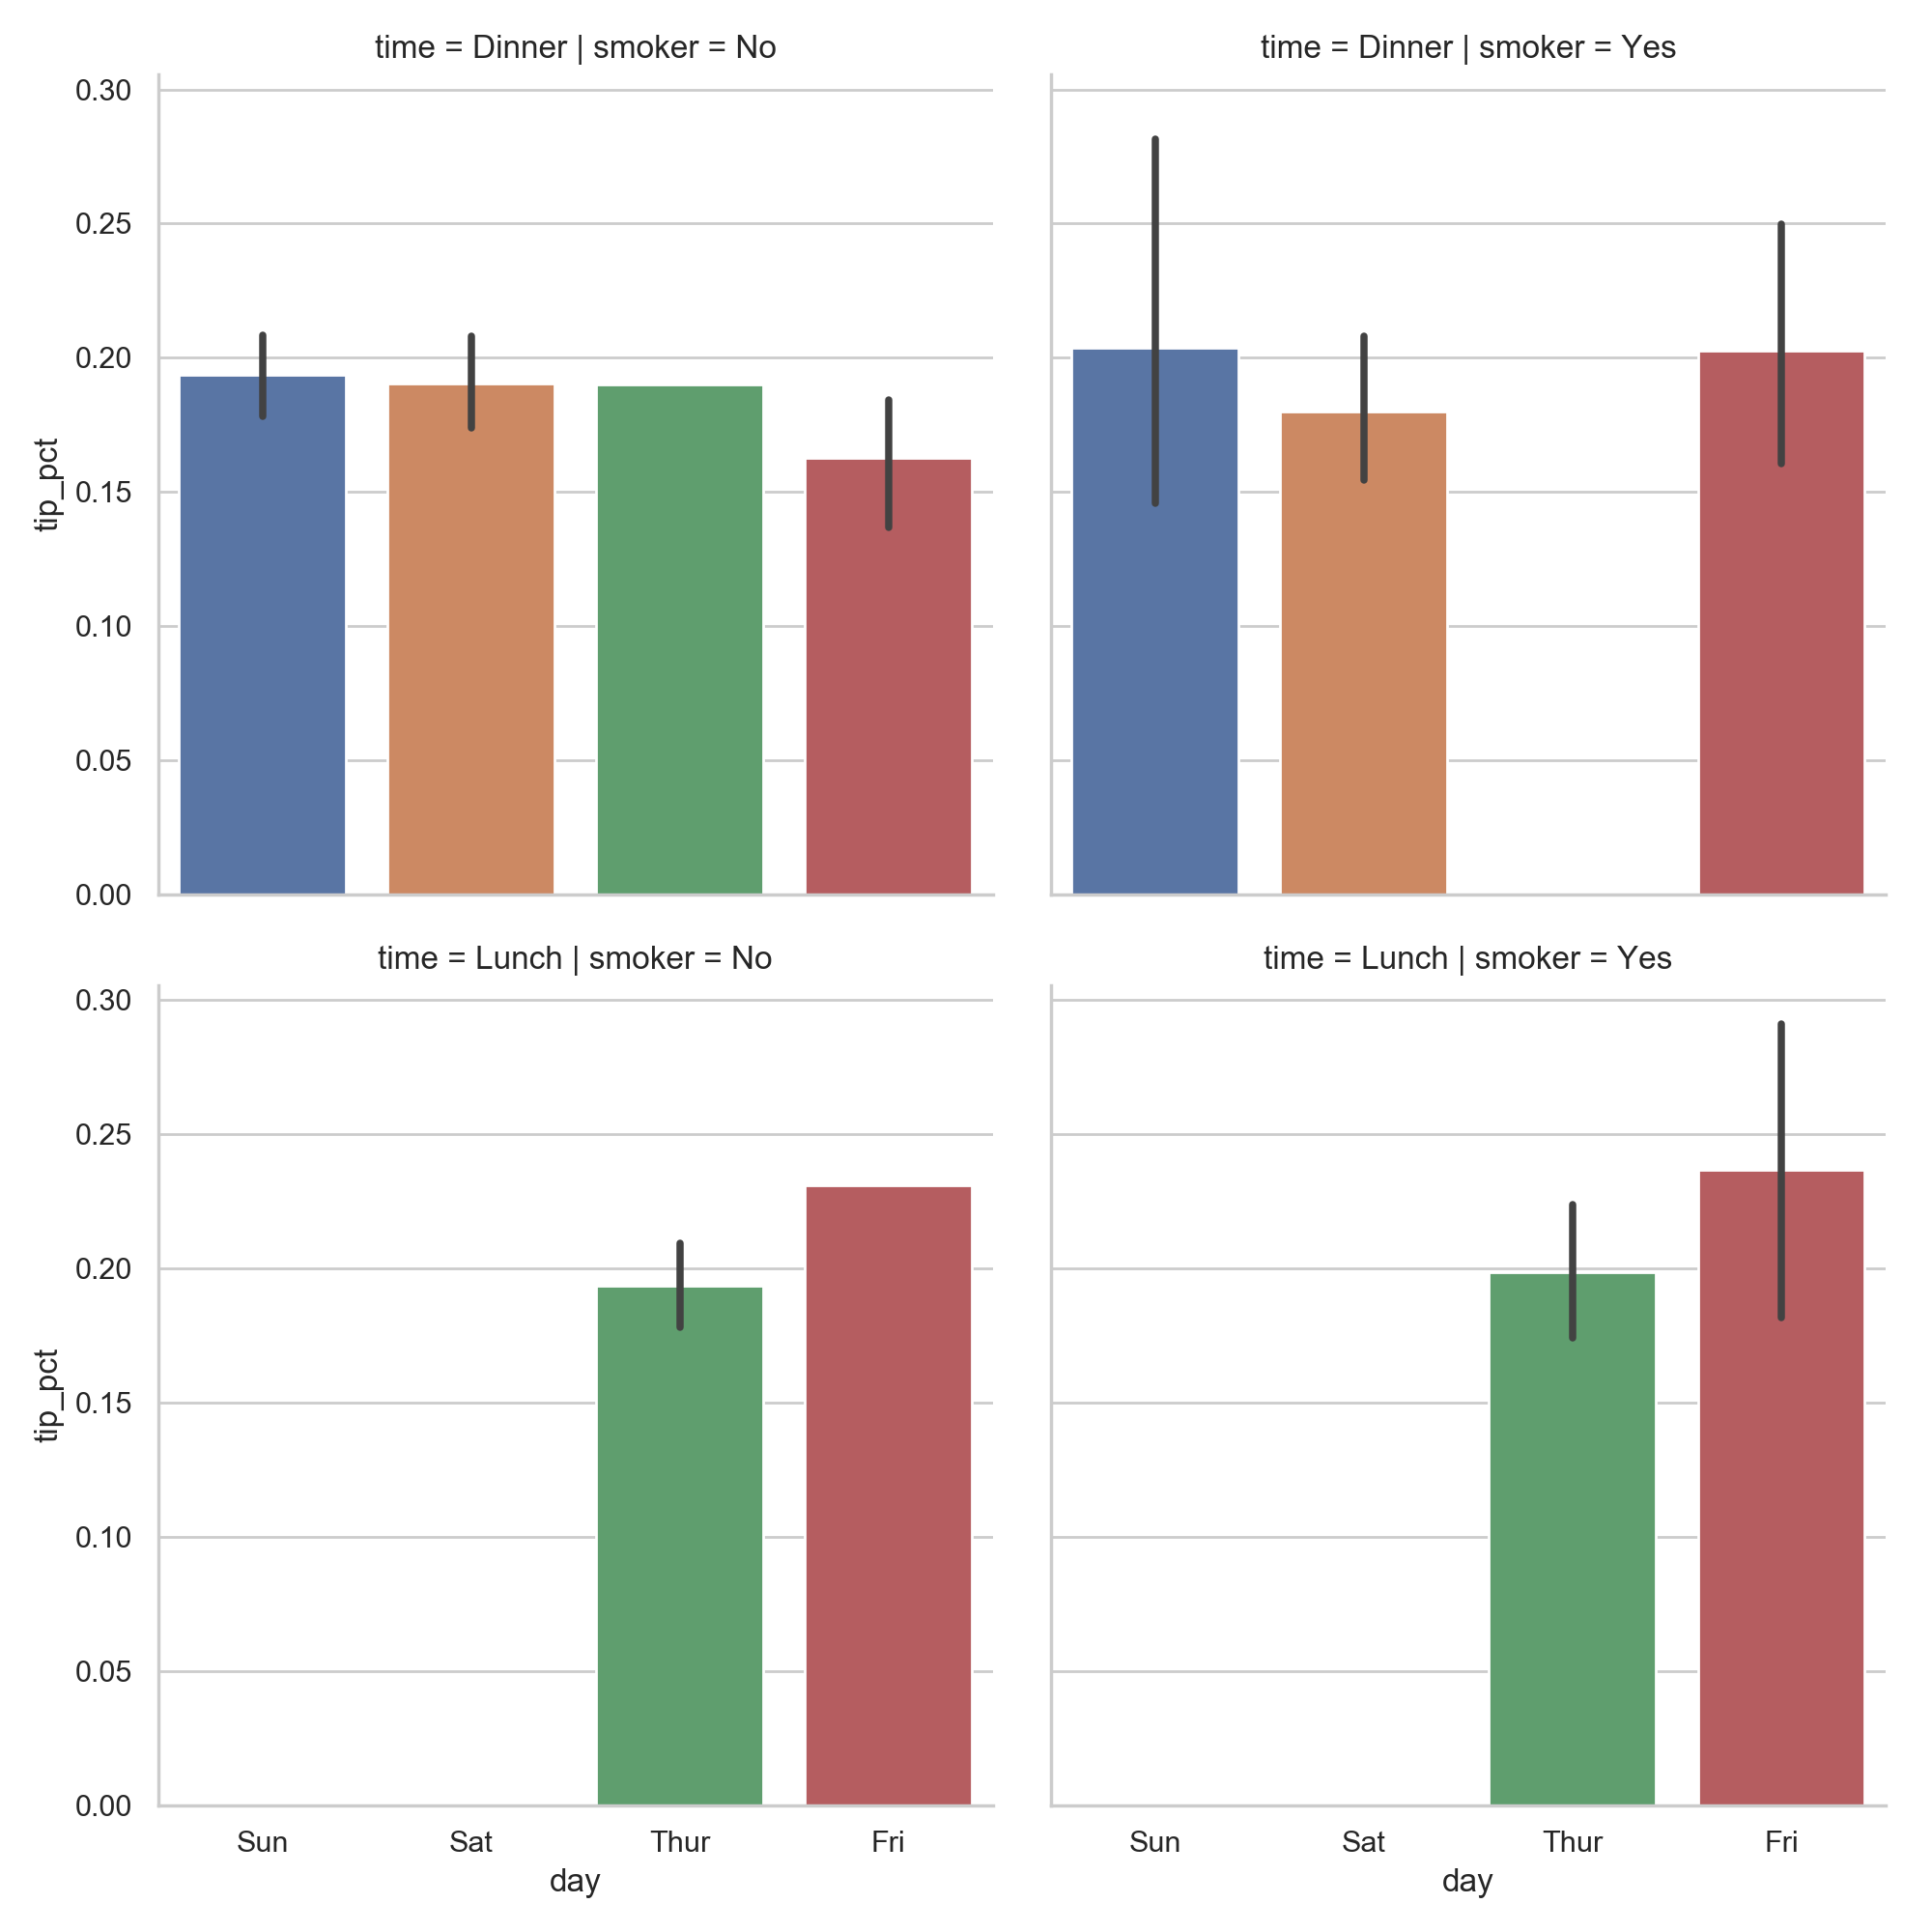

In [71]:
sns.factorplot(x="day", y="tip_pct", row="time",
              col="smoker", kind="bar",  data=tips[tips.tip_pct < 1])

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


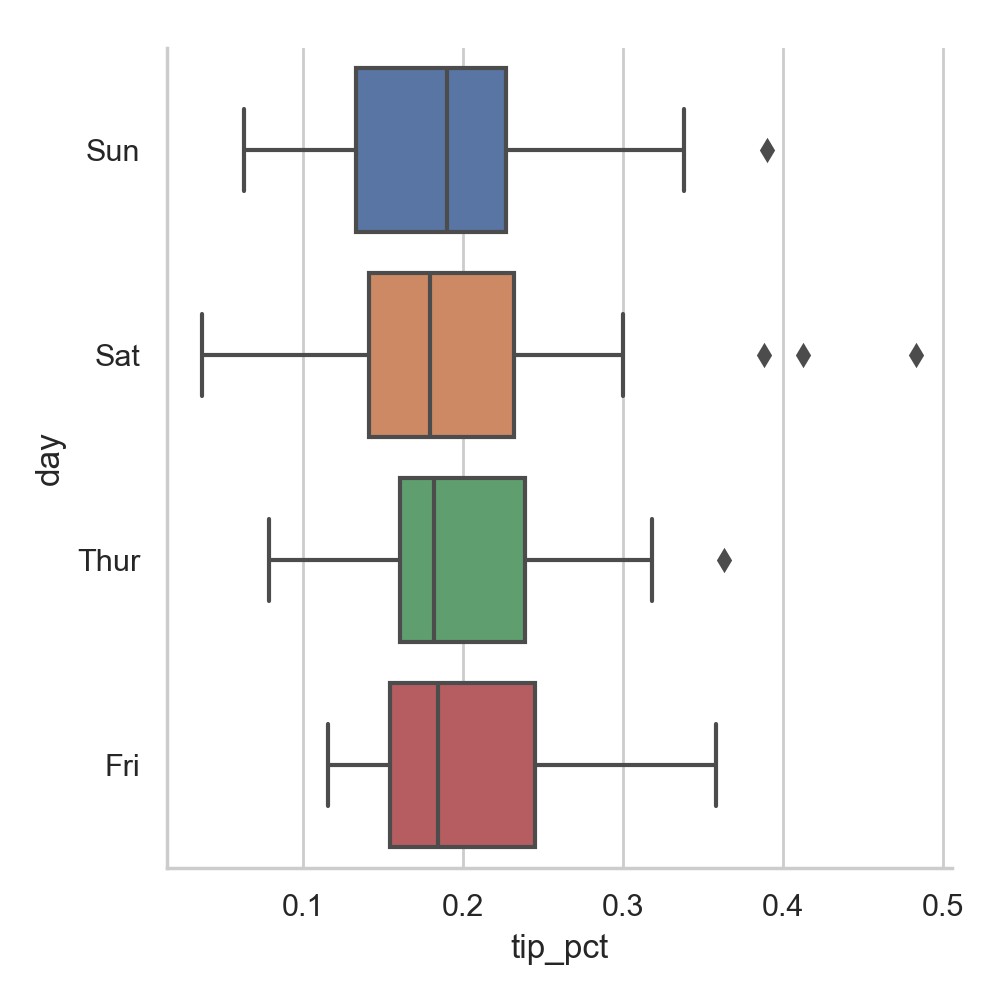

In [74]:
sns.factorplot(x="tip_pct", y="day", kind="box",
                          data=tips[tips.tip_pct < 0.5])